In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#classifiers to be used
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

#Sbpressing some warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=FutureWarning)

#Notebook layout setup
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

### Loading the dataset


In [2]:
cervical_df = pd.read_excel("final dataset.xlsx")
cervical_df.head()

,Age,Gender,ART_Duration,CURRENT_ARV_REGIMEN,Occupation,METHOD_OF_FAMILY_PLANNING,TUBERCULOSIS_STATUS,ARV_ADHERENCE,WHO_HIV_CLINICAL_STAGE,BODY_WEIGHT,Height(cm),NutritionAssesment,TPT_STATUS,AdvancedDiseaseStatus,BASELINECD4,CD4COUNT,VIRAL_LOAD_QUALITATIVE,CC_SCREENING
0,35,F,9.035616,TDF/3TC/DTG,NaN,NaN,No signs or symptoms of TB,GOOD ADHERENCE,HIV WHO CLINICAL STAGE T1,51.0,185.0,NORMAL,Treatment complete,No Advanced Disease,276.0,276.0,BEYOND DETECTABLE LIMIT,No evidence of Malignancy
1,37,F,6.739726,TDF/3TC/DTG,NaN,NaN,No signs or symptoms of TB,GOOD ADHERENCE,HIV WHO CLINICAL STAGE T1,45.0,154.0,NORMAL,Treatment complete,No Advanced Disease,237.0,NaN,BEYOND DETECTABLE LIMIT,No evidence of Malignancy
2,47,F,6.506849,TDF/3TC/DTG,NaN,NaN,No signs or symptoms of TB,GOOD ADHERENCE,HIV WHO CLINICAL STAGE T1,60.0,56.0,NORMAL,Treatment complete,No Advanced Disease,234.0,234.0,BEYOND DETECTABLE LIMIT,No evidence of Malignancy
3,39,F,5.978082,TDF/3TC/DTG,NaN,NaN,No signs or symptoms of TB,GOOD ADHERENCE,HIV WHO CLINICAL STAGE T1,43.0,152.0,NORMAL,Treatment complete,No Advanced Disease,294.0,NaN,BEYOND DETECTABLE LIMIT,Suspicious of Malignancy
4,35,F,6.671233,TDF/3TC/DTG,NaN,INJECTABLE CONTRACEPTIVES,No signs or symptoms of TB,GOOD ADHERENCE,HIV WHO CLINICAL STAGE T1,63.0,159.0,NORMAL,Treatment complete,No Advanced Disease,187.0,NaN,BEYOND DETECTABLE LIMIT,No evidence of Malignancy


In [3]:
#since we are dealing with only females, lets drop the gender column
cervical_df.drop(columns='Gender', inplace=True)

# Expolatory Data Analysis (EDA)

In [4]:
#checking for the shape of the data
cervical_df.shape

(3025, 17)

In [5]:
#checking for the details of the dataset
cervical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3025 non-null   int64  
 1   ART_Duration               3025 non-null   float64
 2   CURRENT_ARV_REGIMEN        3023 non-null   object 
 3   Occupation                 929 non-null    object 
 4   METHOD_OF_FAMILY_PLANNING  1616 non-null   object 
 5   TUBERCULOSIS_STATUS        3022 non-null   object 
 6   ARV_ADHERENCE              3014 non-null   object 
 7   WHO_HIV_CLINICAL_STAGE     2994 non-null   object 
 8   BODY_WEIGHT                2152 non-null   float64
 9   Height(cm)                 2966 non-null   float64
 10  NutritionAssesment         2330 non-null   object 
 11  TPT_STATUS                 2761 non-null   object 
 12  AdvancedDiseaseStatus      2981 non-null   object 
 13  BASELINECD4                1367 non-null   float

it can be observed that most of the variables are objects/strings
thus a need to tranformthem to numric that is understood by ML models.

# Encoding categorical variables

In [6]:
#for current regimen
cervical_df['CURRENT_ARV_REGIMEN'].unique()

array(['TDF/3TC/DTG', 'AZT/3TC/DTG', 'AZT-3TC-ATV/r', 'TDF-3TC-EFV',
       'ABC/3TC/DTG', 'TDF-FTC-EFV', nan, 'TDF-3TC-NVP', 'TDF-3TC-ATV/r',
       'AZT-3TC-NVP'], dtype=object)

In [7]:
#grouping the regimens into first and second regimen

def conditions(s):
    if (s['CURRENT_ARV_REGIMEN'] == 'TDF/3TC/DTG') or (s['CURRENT_ARV_REGIMEN'] == 'ABC/3TC/DTG') or (s['CURRENT_ARV_REGIMEN'] == 'TDF-3TC-NVP') or (s['CURRENT_ARV_REGIMEN'] == 'TDF-FTC-EFV') or (s['CURRENT_ARV_REGIMEN'] == 'TDF-3TC-EFV'):
        return 1
    elif (s['CURRENT_ARV_REGIMEN'] == 'AZT/3TC/DTG') or (s['CURRENT_ARV_REGIMEN'] == 'AZT-3TC-ATV/r') or (s['CURRENT_ARV_REGIMEN'] =='AZT-3TC-NVP' ) or (s['CURRENT_ARV_REGIMEN'] =='TDF-3TC-ATV/r' ):
        return 2
    else:
        return 
    

#applying the condition to the dataframe
cervical_df['CURRENT_ARV_REGIMEN']= cervical_df.apply(conditions, axis=1)



In [8]:
#checking again the unique values in current regimen
cervical_df['CURRENT_ARV_REGIMEN'].unique()

array([ 1.,  2., nan])

# encoding occupation

In [9]:
#checking for the unique values in occupation
cervical_df['Occupation'].unique()

array([nan, 'PILOT', 'COMMERCIAL SEX WORKER',
       'LONG DISTANCE TRUCK DRIVER', 'SELF', 'H', 'WAITER', 'COOK',
       'HAIR DRESSER', 'HOUSEWIFE', 'TEACHER', 'FARMER', 'FOOD VENDOR',
       'MANAGER', 'BUSINESS WOMAN', 'HOTEL ATTENDANT', 'BUSINESS  LADY',
       'HOUSE WIFE', 'RECEPTION', 'SELF EMPLOYED', 'Waitress', 'MAID',
       'HOTELIAN', 'VENDOR', 'HAWKER', 'CLAY MAKER', 'MARKET VENDOR',
       'HOUSE HELPER', 'Works in a company', 'CARE TAKER', 'HOTEL',
       'CLEANER', 'SUPERMARKET ATTENDANT', 'BUILDER', 'HOUSE  WIFE',
       'H/W', 'HAIR   DRESSING', 'FLOWERIST', 'HOUSE MAID', 'WAITRESS',
       'COUNSELLOR', 'CASUAL LABOURER', 'RESTAURANT ATTENDANT',
       'Hair dresser', 'SCHOOL MATRON', 'BUSINESS', 'DDOBI', 'B/W',
       'H/WIFE', 'TAILOR', 'house wife', 'SALOON', 'H,W', 'housewife',
       'SHOP KEEPER', 'CHIPS SELLER', 'SEAMSTRESS', 'BUSINESS LADY',
       'BAKERY', 'TRADER', 'DOBBI', 'Shopkeeper', 'SALOON OPERATOR',
       'SELF EMPLOYEE', 'SALOONIST', 'SHOP ATTENDA

# encoding method of family planing

In [10]:
#checking for the unique values in fp
cervical_df['METHOD_OF_FAMILY_PLANNING'].unique()

array([nan, 'INJECTABLE CONTRACEPTIVES', 'CONDOMS', 'ORAL CONTRACEPTION',
       'NATURAL FAMILY PLANNING', 'INTRAUTERINE DEVICE', 'DIAPHRAGM',
       'Implant', 'VASECTOMY HYSTERECTOMY TUBAL LIGATION',
       'No family planning method given', 'Other'], dtype=object)

In [11]:
#encoding tb status

def conditions(fp):
    if (fp['METHOD_OF_FAMILY_PLANNING'] == 'CONDOMS') or (fp['METHOD_OF_FAMILY_PLANNING'] == 'NATURAL FAMILY PLANNING')or (fp['METHOD_OF_FAMILY_PLANNING'] == 'INTRAUTERINE DEVICE') or (fp['METHOD_OF_FAMILY_PLANNING'] == 'VASECTOMY HYSTERECTOMY TUBAL LIGATION') or (fp['METHOD_OF_FAMILY_PLANNING'] == 'DIAPHRAGM'):
        return 1 # non-hormonal
    elif (fp['METHOD_OF_FAMILY_PLANNING'] == 'INJECTABLE CONTRACEPTIVES')or (fp['METHOD_OF_FAMILY_PLANNING'] == 'ORAL CONTRACEPTION') or(fp['METHOD_OF_FAMILY_PLANNING'] == 'Implant') or(fp['METHOD_OF_FAMILY_PLANNING'] == 'Other') :
        return 2 #hormonal
    
    elif (fp['METHOD_OF_FAMILY_PLANNING'] == 'No family planning method given'):
        return 3 #no fp

    else:
        return 
    
#applying the condition to the dataframe
cervical_df['METHOD_OF_FAMILY_PLANNING']= cervical_df.apply(conditions, axis=1)
    

In [12]:
#checking for the unique values in fp
cervical_df['METHOD_OF_FAMILY_PLANNING'].unique()

array([nan,  2.,  1.,  3.])

# enconding TB status

In [13]:
#checking for the unique values in TB status
cervical_df['TUBERCULOSIS_STATUS'].unique()


array(['No signs or symptoms of TB',
       'Suspect TB - referred or sputum sent',
       'Currently on TB treatment', 'TB Diagnosed - Clinically diagnosed',
       nan, 'TB Diagnosed - TB LAM', 'TB Diagnosed - Gene Xpert'],
      dtype=object)

In [14]:
#encoding tb status

def conditions(tb):
    if (tb['TUBERCULOSIS_STATUS'] == 'No signs or symptoms of TB'):
        return 1 # for no signs
    elif (tb['TUBERCULOSIS_STATUS'] == 'Suspect TB - referred or sputum sent'):
        return 2 #tb suspect
    elif (tb['TUBERCULOSIS_STATUS'] == 'Currently on TB treatment') or (tb['TUBERCULOSIS_STATUS'] == 'TB Diagnosed - Clinically diagnosed') or (tb['TUBERCULOSIS_STATUS'] == 'TB Diagnosed - TB LAM') or (tb['TUBERCULOSIS_STATUS'] == 'TB Diagnosed - Gene Xpert'):
        return 3 #on tb treatment
    else:
        return 
    
#applying the condition to the dataframe
cervical_df['TUBERCULOSIS_STATUS']= cervical_df.apply(conditions, axis=1)
    

In [15]:
cervical_df['TUBERCULOSIS_STATUS'].unique()

array([ 1.,  2.,  3., nan])

# encoding ARV adherence

In [16]:
cervical_df['ARV_ADHERENCE'].unique()

array(['GOOD ADHERENCE', 'FAIR ADHERENCE', 'POOR ADHERENCE', nan],
      dtype=object)

In [17]:
#encoding adherence

def conditions(ad):
    if (ad['ARV_ADHERENCE'] == 'GOOD ADHERENCE'):
        return 1
    elif (ad['ARV_ADHERENCE'] == 'FAIR ADHERENCE'):
        return 2 
    elif (ad['ARV_ADHERENCE'] == 'POOR ADHERENCE'):
        return 3 
    else:
        return 
    
#applying the condition to the dataframe
cervical_df['ARV_ADHERENCE']= cervical_df.apply(conditions, axis=1)

In [18]:
cervical_df['ARV_ADHERENCE'].unique()

array([ 1.,  2.,  3., nan])

In [19]:
#renaming the ANTI-RETROVIRAL DRUG ADHERENCE ASSESSMENT CODE column
#cervical_df.rename(columns={"ANTI-RETROVIRAL DRUG ADHERENCE ASSESSMENT CODE": "ARV ADHERENCE"},inplace=True)

In [20]:
cervical_df.head(3)

,Age,ART_Duration,CURRENT_ARV_REGIMEN,Occupation,METHOD_OF_FAMILY_PLANNING,TUBERCULOSIS_STATUS,ARV_ADHERENCE,WHO_HIV_CLINICAL_STAGE,BODY_WEIGHT,Height(cm),NutritionAssesment,TPT_STATUS,AdvancedDiseaseStatus,BASELINECD4,CD4COUNT,VIRAL_LOAD_QUALITATIVE,CC_SCREENING
0,35,9.035616,1.0,NaN,NaN,1.0,1.0,HIV WHO CLINICAL STAGE T1,51.0,185.0,NORMAL,Treatment complete,No Advanced Disease,276.0,276.0,BEYOND DETECTABLE LIMIT,No evidence of Malignancy
1,37,6.739726,1.0,NaN,NaN,1.0,1.0,HIV WHO CLINICAL STAGE T1,45.0,154.0,NORMAL,Treatment complete,No Advanced Disease,237.0,NaN,BEYOND DETECTABLE LIMIT,No evidence of Malignancy
2,47,6.506849,1.0,NaN,NaN,1.0,1.0,HIV WHO CLINICAL STAGE T1,60.0,56.0,NORMAL,Treatment complete,No Advanced Disease,234.0,234.0,BEYOND DETECTABLE LIMIT,No evidence of Malignancy


# encoding WHO clinicla stage

In [21]:
#checking for unique values in the column
cervical_df['WHO_HIV_CLINICAL_STAGE'].unique()

array(['HIV WHO CLINICAL STAGE T1', 'HIV WHO CLINICAL STAGE 1',
       'HIV WHO CLINICAL STAGE 4', 'HIV WHO CLINICAL STAGE T2',
       'HIV WHO CLINICAL STAGE 2', 'HIV WHO CLINICAL STAGE 3', nan,
       'HIV WHO CLINICAL STAGE T3', 'HIV WHO CLINICAL STAGE T4'],
      dtype=object)

In [22]:
#encoding WHO clinical stage

def conditions(wh):
    if (wh['WHO_HIV_CLINICAL_STAGE'] == 'HIV WHO CLINICAL STAGE T1') or (wh['WHO_HIV_CLINICAL_STAGE'] == 'HIV WHO CLINICAL STAGE 1'):
        return 1 #clinical stage 1
    
    elif (wh['WHO_HIV_CLINICAL_STAGE'] == 'HIV WHO CLINICAL STAGE T2') or (wh['WHO_HIV_CLINICAL_STAGE'] == 'HIV WHO CLINICAL STAGE 2'):
        return 2  #stage 2
    
    elif (wh['WHO_HIV_CLINICAL_STAGE'] == 'HIV WHO CLINICAL STAGE T3') or (wh['WHO_HIV_CLINICAL_STAGE'] == 'HIV WHO CLINICAL STAGE 3'):
        return 3 #stage 3
    
    elif (wh['WHO_HIV_CLINICAL_STAGE'] == 'HIV WHO CLINICAL STAGE T4') or (wh['WHO_HIV_CLINICAL_STAGE'] == 'HIV WHO CLINICAL STAGE 4'):
        return 4 #stage 4
    else:
        return 
    
#applying the condition to the dataframe
cervical_df['WHO_HIV_CLINICAL_STAGE']= cervical_df.apply(conditions, axis=1)

In [23]:
#re-checking for unique values in the column
cervical_df['WHO_HIV_CLINICAL_STAGE'].unique()

array([ 1.,  4.,  2.,  3., nan])

# encoding nutrition assessment


In [24]:
#checking for unique values in the column
cervical_df['NutritionAssesment'].unique()

array(['NORMAL', 'MODERATE ACUTE MALNUTRITION',
       'SEVERE ACUTE MALNUTRITION WITH OEDEMA',
       'SEVERE ACUTE MALNUTRITION', nan], dtype=object)

In [25]:
#encoding nutrition assessment

def conditions(ns):
    if (ns['NutritionAssesment'] == 'NORMAL'):
        return 1 #normal
    
    elif (ns['NutritionAssesment'] == 'MODERATE ACUTE MALNUTRITION'):
        return 2 #MAM
    
    elif (ns['NutritionAssesment'] == 'SEVERE ACUTE MALNUTRITION') or (ns['NutritionAssesment'] == 'SEVERE ACUTE MALNUTRITION WITH OEDEMA'):
        return 3 #SAM
    else:
        return 
    
#applying the condition to the dataframe
cervical_df['NutritionAssesment']= cervical_df.apply(conditions, axis=1)

In [26]:
#RE-checking for unique values in the column
cervical_df['NutritionAssesment'].unique()

array([ 1.,  2.,  3., nan])

# encoding TPT STATUS

In [27]:
cervical_df['TPT_STATUS'].unique()

array(['Treatment complete', 'CURRENTLY ON INH PROPHYLAXIS FOR TB',
       'TOXICITY OR SIDE-EFFECTS', 'Never', nan], dtype=object)

In [28]:
#encoding nutrition assessment

def conditions(tpt):
    if (tpt['TPT_STATUS'] == 'Never'):
        return 1 #vever initiated
    
    elif (tpt['TPT_STATUS'] == 'CURRENTLY ON INH PROPHYLAXIS FOR TB'):
        return 2 #ontreatment
    
    elif (tpt['TPT_STATUS'] == 'TOXICITY OR SIDE-EFFECTS'):
        return 3 #removed
    
    elif (tpt['TPT_STATUS'] == 'Treatment complete'):
        return 4 #completed
    else:
        return 
    
#applying the condition to the dataframe
cervical_df['TPT_STATUS']= cervical_df.apply(conditions, axis=1)

In [29]:
cervical_df['TPT_STATUS'].unique()

array([ 4.,  2.,  3.,  1., nan])

# encoding adavanced disease status

In [30]:
cervical_df['AdvancedDiseaseStatus'].unique()

array(['No Advanced Disease', nan, 'Confirmed Advanced Disease-Pos TB',
       'Suspected Advanced Disease',
       'Confirmed Advanced Disease - WHO Stage 3/4',
       'Confirmed Advanced Disease CD4  <200',
       'Confirmed Advanced Disease-Pos CrAg'], dtype=object)

In [31]:

def conditions(ad):
    if (ad['AdvancedDiseaseStatus'] == 'No Advanced Disease'):
        return 1 
    
    elif (ad['AdvancedDiseaseStatus'] == 'Suspected Advanced Disease'):
        return 2 
    
    elif (ad['AdvancedDiseaseStatus'] == 'Confirmed Advanced Disease-Pos TB') or (ad['AdvancedDiseaseStatus'] == 'Confirmed Advanced Disease - WHO Stage 3/4') or (ad['AdvancedDiseaseStatus'] == 'Confirmed Advanced Disease CD4  <200') or (ad['AdvancedDiseaseStatus'] == 'Confirmed Advanced Disease-Pos CrAg') :
        return 3 
    
    else:
        return 
    
#applying the condition to the dataframe
cervical_df['AdvancedDiseaseStatus']= cervical_df.apply(conditions, axis=1)

In [32]:
cervical_df['AdvancedDiseaseStatus'].unique()

array([ 1., nan,  3.,  2.])

# encoding viral load

In [33]:
cervical_df['VIRAL_LOAD_QUALITATIVE'].unique()

array(['BEYOND DETECTABLE LIMIT', 'DETECTED', nan, 'POOR SAMPLE QUALITY'],
      dtype=object)

In [34]:
def conditions(vl):
    if (vl['VIRAL_LOAD_QUALITATIVE'] == 'BEYOND DETECTABLE LIMIT'):
        return 1 # NOT DETECTED
    
    elif (vl['VIRAL_LOAD_QUALITATIVE'] == 'DETECTED'):
        return 2 #DETECTED
    
    else:
        return 
    
#applying the condition to the dataframe
cervical_df['VIRAL_LOAD_QUALITATIVE']= cervical_df.apply(conditions, axis=1)

In [35]:
cervical_df['VIRAL_LOAD_QUALITATIVE'].unique()

array([ 1.,  2., nan])

# enconding cervical cancer screening

In [36]:
cervical_df['CC_SCREENING'].unique()

array(['No evidence of Malignancy', 'Suspicious of Malignancy'],
      dtype=object)

In [37]:
def conditions(cc):
    if (cc['CC_SCREENING'] == 'Suspicious of Malignancy'):
        return 1 #SUSPECIOUS
    
    else:
        return 0 #NO EVIDENCE
    
#applying the condition to the dataframe
cervical_df['CC_SCREENING']= cervical_df.apply(conditions, axis=1)

In [38]:
cervical_df['CC_SCREENING'].unique()

array([0, 1], dtype=int64)

In [39]:
#renaming the new dataframe
cc_df = cervical_df
cc_df.head()

,Age,ART_Duration,CURRENT_ARV_REGIMEN,Occupation,METHOD_OF_FAMILY_PLANNING,TUBERCULOSIS_STATUS,ARV_ADHERENCE,WHO_HIV_CLINICAL_STAGE,BODY_WEIGHT,Height(cm),NutritionAssesment,TPT_STATUS,AdvancedDiseaseStatus,BASELINECD4,CD4COUNT,VIRAL_LOAD_QUALITATIVE,CC_SCREENING
0,35,9.035616,1.0,NaN,NaN,1.0,1.0,1.0,51.0,185.0,1.0,4.0,1.0,276.0,276.0,1.0,0
1,37,6.739726,1.0,NaN,NaN,1.0,1.0,1.0,45.0,154.0,1.0,4.0,1.0,237.0,NaN,1.0,0
2,47,6.506849,1.0,NaN,NaN,1.0,1.0,1.0,60.0,56.0,1.0,4.0,1.0,234.0,234.0,1.0,0
3,39,5.978082,1.0,NaN,NaN,1.0,1.0,1.0,43.0,152.0,1.0,4.0,1.0,294.0,NaN,1.0,1
4,35,6.671233,1.0,NaN,2.0,1.0,1.0,1.0,63.0,159.0,1.0,4.0,1.0,187.0,NaN,1.0,0


In [40]:
cc_df.describe()

,Age,ART_Duration,CURRENT_ARV_REGIMEN,METHOD_OF_FAMILY_PLANNING,TUBERCULOSIS_STATUS,ARV_ADHERENCE,WHO_HIV_CLINICAL_STAGE,BODY_WEIGHT,Height(cm),NutritionAssesment,TPT_STATUS,AdvancedDiseaseStatus,BASELINECD4,CD4COUNT,VIRAL_LOAD_QUALITATIVE,CC_SCREENING
count,3025.000000,3025.000000,3023.000000,1616.000000,3022.000000,3014.000000,2994.000000,2152.000000,2966.000000,2330.000000,2761.000000,2981.000000,1367.000000,737.000000,2742.000000,3025.000000
mean,34.576860,5.016217,1.021833,1.840347,1.035076,1.006967,1.033734,62.482760,157.179366,1.004721,3.775444,1.010399,380.190929,474.487110,1.137856,0.027769
std,9.505505,3.662568,0.146161,0.373096,0.220049,0.107554,0.233792,13.699496,10.976767,0.085305,0.694381,0.127808,263.426972,311.044249,0.344811,0.164336
min,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,28.000000,1.906849,1.000000,2.000000,1.000000,1.000000,1.000000,54.000000,153.000000,1.000000,4.000000,1.000000,189.000000,239.000000,1.000000,0.000000
50%,33.000000,4.298630,1.000000,2.000000,1.000000,1.000000,1.000000,60.000000,158.000000,1.000000,4.000000,1.000000,336.000000,428.000000,1.000000,0.000000
75%,40.000000,7.797260,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,162.000000,1.000000,4.000000,1.000000,518.500000,651.000000,1.000000,0.000000
max,83.000000,28.736986,2.000000,3.000000,3.000000,3.000000,4.000000,150.000000,238.900000,3.000000,4.000000,3.000000,2226.000000,2730.000000,2.000000,1.000000


In [41]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3025 non-null   int64  
 1   ART_Duration               3025 non-null   float64
 2   CURRENT_ARV_REGIMEN        3023 non-null   float64
 3   Occupation                 929 non-null    object 
 4   METHOD_OF_FAMILY_PLANNING  1616 non-null   float64
 5   TUBERCULOSIS_STATUS        3022 non-null   float64
 6   ARV_ADHERENCE              3014 non-null   float64
 7   WHO_HIV_CLINICAL_STAGE     2994 non-null   float64
 8   BODY_WEIGHT                2152 non-null   float64
 9   Height(cm)                 2966 non-null   float64
 10  NutritionAssesment         2330 non-null   float64
 11  TPT_STATUS                 2761 non-null   float64
 12  AdvancedDiseaseStatus      2981 non-null   float64
 13  BASELINECD4                1367 non-null   float

In [42]:
#checking for null values
cc_df.isnull().sum()

Age                             0
ART_Duration                    0
CURRENT_ARV_REGIMEN             2
Occupation                   2096
METHOD_OF_FAMILY_PLANNING    1409
TUBERCULOSIS_STATUS             3
ARV_ADHERENCE                  11
WHO_HIV_CLINICAL_STAGE         31
BODY_WEIGHT                   873
Height(cm)                     59
NutritionAssesment            695
TPT_STATUS                    264
AdvancedDiseaseStatus          44
BASELINECD4                  1658
CD4COUNT                     2288
VIRAL_LOAD_QUALITATIVE        283
CC_SCREENING                    0
dtype: int64

In [43]:
#percentage of null values  in each columns 
cc_df.isnull().sum()/len(cc_df)*100

Age                           0.000000
ART_Duration                  0.000000
CURRENT_ARV_REGIMEN           0.066116
Occupation                   69.289256
METHOD_OF_FAMILY_PLANNING    46.578512
TUBERCULOSIS_STATUS           0.099174
ARV_ADHERENCE                 0.363636
WHO_HIV_CLINICAL_STAGE        1.024793
BODY_WEIGHT                  28.859504
Height(cm)                    1.950413
NutritionAssesment           22.975207
TPT_STATUS                    8.727273
AdvancedDiseaseStatus         1.454545
BASELINECD4                  54.809917
CD4COUNT                     75.636364
VIRAL_LOAD_QUALITATIVE        9.355372
CC_SCREENING                  0.000000
dtype: float64

from the percentage of null values, i am dropping variables with 0ver 60% 0f null value

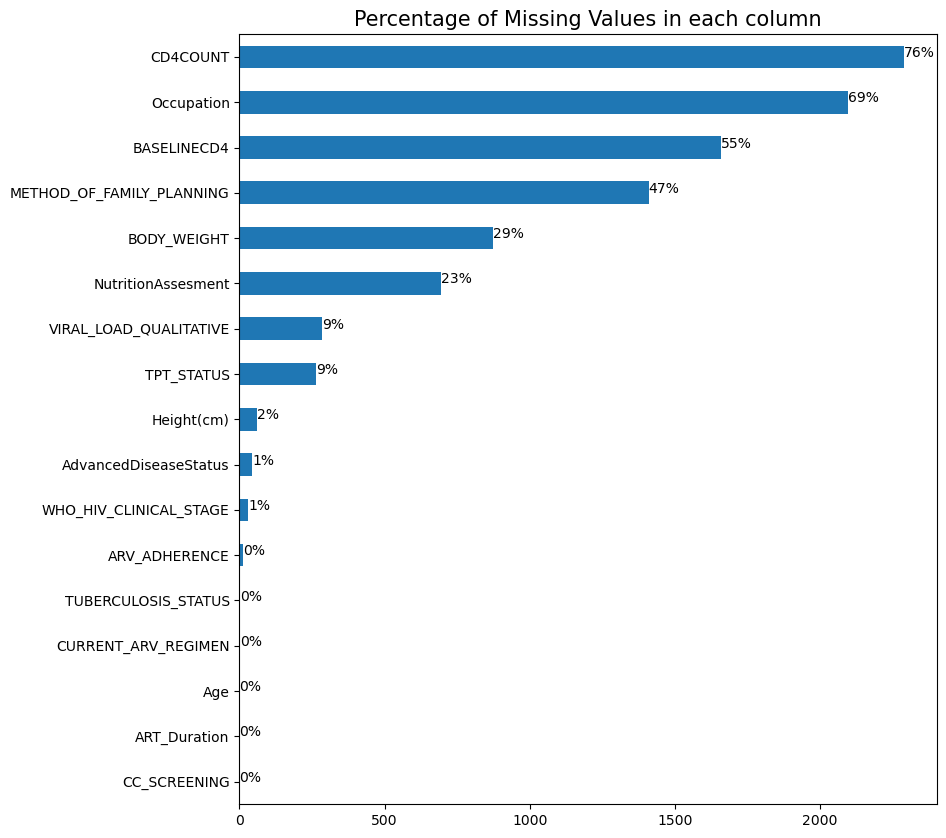

In [44]:
# Plot missing values in dataset
ax = cc_df.isna().sum().sort_values(ascending = False)[:18][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values in each column', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/cc_df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [45]:
#dropping occupation and cd4 count since they have alot of missing values
cc_df.drop(columns=['Occupation','CD4COUNT'], inplace=True)

# checking for the distribution of the quantitative variables and filling in for their missing values

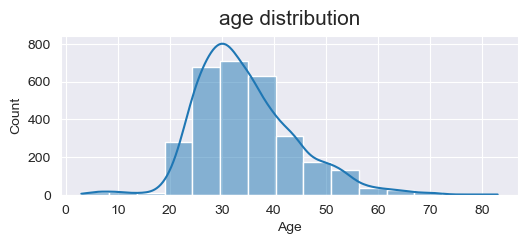

None

0.7369894994359782

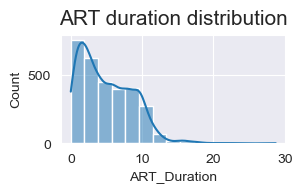

None

0.7599802958164021

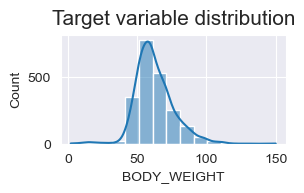

None

0.6170811946227527

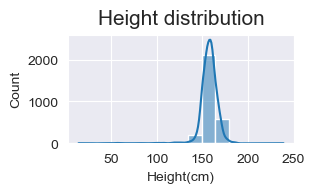

None

-4.455726279668018

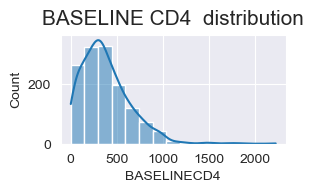

None

1.3115996563128443

In [46]:
#for weight
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))

plt.subplot(3,2,1)
sns.histplot(cc_df['Age'], kde = True, bins = 15)
plt.title('age distribution', y = 1.02, fontsize = 15)
display(plt.show(), cc_df['Age'].skew())


#ART duration
plt.subplot(3,2,2)
sns.histplot(cc_df['ART_Duration'], kde = True, bins = 15)
plt.title('ART duration distribution', y = 1.02, fontsize = 15)
display(plt.show(), cc_df['ART_Duration'].skew())

#for weight
plt.subplot(3,2,3)
sns.histplot(cc_df['BODY_WEIGHT'], kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), cc_df['BODY_WEIGHT'].skew())

#for height
plt.subplot(3,2,4)
sns.histplot(cc_df['Height(cm)'], kde = True, bins = 15)
plt.title('Height distribution', y = 1.02, fontsize = 15)
display(plt.show(), cc_df['Height(cm)'].skew())

#for Bseline cd4
plt.subplot(3,2,5)
sns.histplot(cc_df['BASELINECD4'], kde = True, bins = 15)
plt.title('BASELINE CD4  distribution', y = 1.02, fontsize = 15)
display(plt.show(), cc_df['BASELINECD4'].skew())


from the above plots the data is it is observed that the data are skewed and thus the median will be used to impute for the missing values, 


#filling for the missing values

In [47]:
#handling missing values of weight using the median
cc_df['BODY_WEIGHT'] =cc_df['BODY_WEIGHT'].fillna(cc_df['BODY_WEIGHT'].median())

#handling missing values of height using the median
cc_df['Height(cm)'] =cc_df['Height(cm)'].fillna(cc_df['Height(cm)'].median())

#handling missing values of height using the median
cc_df['BASELINECD4'] =cc_df['BASELINECD4'].fillna(cc_df['BASELINECD4'].median())

In [48]:
#checking to see if there are no more missing values in quantitative variables
cc_df.isnull().sum()

Age                             0
ART_Duration                    0
CURRENT_ARV_REGIMEN             2
METHOD_OF_FAMILY_PLANNING    1409
TUBERCULOSIS_STATUS             3
ARV_ADHERENCE                  11
WHO_HIV_CLINICAL_STAGE         31
BODY_WEIGHT                     0
Height(cm)                      0
NutritionAssesment            695
TPT_STATUS                    264
AdvancedDiseaseStatus          44
BASELINECD4                     0
VIRAL_LOAD_QUALITATIVE        283
CC_SCREENING                    0
dtype: int64

# using the KNN imputer to fill the missing values for categorical variables


In [49]:
#importing the imputer
from sklearn.impute import KNNImputer
#initiating the model
knn_imp = KNNImputer(n_neighbors=5)

#fit_transforming the imputer

cc_df[['Age', 'ART_Duration', 'CURRENT_ARV_REGIMEN',
       'METHOD_OF_FAMILY_PLANNING', 'TUBERCULOSIS_STATUS', 'ARV_ADHERENCE',
       'WHO_HIV_CLINICAL_STAGE', 'BODY_WEIGHT', 'Height(cm)',
       'NutritionAssesment', 'TPT_STATUS', 'AdvancedDiseaseStatus',
       'BASELINECD4', 'VIRAL_LOAD_QUALITATIVE', 'CC_SCREENING']]= knn_imp.fit_transform(cc_df[['Age', 'ART_Duration', 'CURRENT_ARV_REGIMEN',
       'METHOD_OF_FAMILY_PLANNING', 'TUBERCULOSIS_STATUS', 'ARV_ADHERENCE',
       'WHO_HIV_CLINICAL_STAGE', 'BODY_WEIGHT', 'Height(cm)',
       'NutritionAssesment', 'TPT_STATUS', 'AdvancedDiseaseStatus',
       'BASELINECD4', 'VIRAL_LOAD_QUALITATIVE', 'CC_SCREENING']])

In [50]:
#confirming that no more missing values
cc_df.isnull().sum()

Age                          0
ART_Duration                 0
CURRENT_ARV_REGIMEN          0
METHOD_OF_FAMILY_PLANNING    0
TUBERCULOSIS_STATUS          0
ARV_ADHERENCE                0
WHO_HIV_CLINICAL_STAGE       0
BODY_WEIGHT                  0
Height(cm)                   0
NutritionAssesment           0
TPT_STATUS                   0
AdvancedDiseaseStatus        0
BASELINECD4                  0
VIRAL_LOAD_QUALITATIVE       0
CC_SCREENING                 0
dtype: int64

In [51]:
#changing the data type to integer
cc_df=cc_df.astype(int)

In [52]:
cc_df.head()

,Age,ART_Duration,CURRENT_ARV_REGIMEN,METHOD_OF_FAMILY_PLANNING,TUBERCULOSIS_STATUS,ARV_ADHERENCE,WHO_HIV_CLINICAL_STAGE,BODY_WEIGHT,Height(cm),NutritionAssesment,TPT_STATUS,AdvancedDiseaseStatus,BASELINECD4,VIRAL_LOAD_QUALITATIVE,CC_SCREENING
0,35,9,1,1,1,1,1,51,185,1,4,1,276,1,0
1,37,6,1,1,1,1,1,45,154,1,4,1,237,1,0
2,47,6,1,1,1,1,1,60,56,1,4,1,234,1,0
3,39,5,1,1,1,1,1,43,152,1,4,1,294,1,1
4,35,6,1,2,1,1,1,63,159,1,4,1,187,1,0


In [53]:
cc_df.describe(include='all')

,Age,ART_Duration,CURRENT_ARV_REGIMEN,METHOD_OF_FAMILY_PLANNING,TUBERCULOSIS_STATUS,ARV_ADHERENCE,WHO_HIV_CLINICAL_STAGE,BODY_WEIGHT,Height(cm),NutritionAssesment,TPT_STATUS,AdvancedDiseaseStatus,BASELINECD4,VIRAL_LOAD_QUALITATIVE,CC_SCREENING
count,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,34.576860,4.526612,1.021818,1.633058,1.035041,1.006942,1.033388,61.749752,157.129917,1.003636,3.733884,1.010248,355.969917,1.124959,0.027769
std,9.505505,3.654566,0.146114,0.484786,0.219943,0.107359,0.232615,11.615357,10.870388,0.074890,0.700712,0.126880,178.410694,0.330727,0.164336
min,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,56.000000,153.000000,1.000000,4.000000,1.000000,336.000000,1.000000,0.000000
50%,33.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,60.000000,158.000000,1.000000,4.000000,1.000000,336.000000,1.000000,0.000000
75%,40.000000,7.000000,1.000000,2.000000,1.000000,1.000000,1.000000,65.000000,162.000000,1.000000,4.000000,1.000000,336.000000,1.000000,0.000000
max,83.000000,28.000000,2.000000,3.000000,3.000000,3.000000,4.000000,150.000000,238.000000,3.000000,4.000000,3.000000,2226.000000,2.000000,1.000000


Decoding the features

In [54]:
#grouping the regimens into first and second regimen

def conditions(s):
    if (s['CURRENT_ARV_REGIMEN'] == 1):
        return "1st line"
   
    else:
        return "2nd line"
    

#applying the condition to the dataframe
cc_df['CURRENT_ARV_REGIMEN']= cervical_df.apply(conditions, axis=1)
    

In [55]:
#checking again the unique values in current regimen
cc_df['CURRENT_ARV_REGIMEN'].unique()

array(['1st line', '2nd line'], dtype=object)

In [56]:
#Dencoding tb status

def conditions(fp):
    if (fp['METHOD_OF_FAMILY_PLANNING'] == 1):
        return "none hormonal" # non-hormonal
    elif (fp['METHOD_OF_FAMILY_PLANNING'] == 2) :
        return "hormonal" #hormonal
    
    else:
        return "no FP" #no fp
    
#applying the condition to the dataframe
cc_df['METHOD_OF_FAMILY_PLANNING']= cervical_df.apply(conditions, axis=1)
    

In [57]:
#checking for the unique values in fp
cc_df['METHOD_OF_FAMILY_PLANNING'].unique()

array(['no FP', 'hormonal', 'none hormonal'], dtype=object)

In [58]:
#dencoding tb status

def conditions(tb):
    if (tb['TUBERCULOSIS_STATUS'] == 1):
        return "no signs" # for no signs
    elif (tb['TUBERCULOSIS_STATUS'] == 2):
        return "TB suspect" #tb suspect
    
    else:
        return "on TB treatment" #on tb treatment
    
#applying the condition to the dataframe
cc_df['TUBERCULOSIS_STATUS']= cervical_df.apply(conditions, axis=1)
    

In [59]:
cc_df['TUBERCULOSIS_STATUS'].unique()

array(['no signs', 'TB suspect', 'on TB treatment'], dtype=object)

In [60]:
#encoding adherence

def conditions(ad):
    if (ad['ARV_ADHERENCE'] == 1):
        return "Good"
    elif (ad['ARV_ADHERENCE'] == 2):
        return "Fair" 
    
    else:
        return "Poor"
    
#applying the condition to the dataframe
cc_df['ARV_ADHERENCE']= cervical_df.apply(conditions, axis=1)

In [61]:
cc_df['ARV_ADHERENCE'].unique()

array(['Good', 'Fair', 'Poor'], dtype=object)

In [62]:
#dencoding WHO clinical stage

def conditions(wh):
    if (wh['WHO_HIV_CLINICAL_STAGE'] == 1):
        return "Clinical stage 1" #clinical stage 1
    
    elif (wh['WHO_HIV_CLINICAL_STAGE'] == 2):
        return "Clinical stage 2"  #stage 2
    
    elif (wh['WHO_HIV_CLINICAL_STAGE'] == 3):
        return "Clinical stage 3" #stage 3
    
    else:
        return "Clinical stage 4" #stage 4
    
#applying the condition to the dataframe
cc_df['WHO_HIV_CLINICAL_STAGE']= cervical_df.apply(conditions, axis=1)

In [63]:
#re-checking for unique values in the column
cc_df['WHO_HIV_CLINICAL_STAGE'].unique()

array(['Clinical stage 1', 'Clinical stage 4', 'Clinical stage 2',
       'Clinical stage 3'], dtype=object)

In [64]:
#decoding nutrition assessment

def conditions(ns):
    if (ns['NutritionAssesment'] == 1):
        return 'NORMAL' #normal
    
    elif (ns['NutritionAssesment'] == 2):
        return "MAM" #MAM
    
    else:
        return "SAM"  #SAM
    
#applying the condition to the dataframe
cc_df['NutritionAssesment']= cervical_df.apply(conditions, axis=1)

In [65]:
#RE-checking for unique values in the column
cc_df['NutritionAssesment'].unique()

array(['NORMAL', 'MAM', 'SAM'], dtype=object)

In [66]:
#decoding TPT Status

def conditions(tpt):
    if (tpt['TPT_STATUS'] == 1):
        return "Never" #vever initiated
    
    elif (tpt['TPT_STATUS'] == 2):
        return "On treatment" #ontreatment
    
    elif (tpt['TPT_STATUS'] == 3):
        return "Removed/stopped" #removed
    
    
    else:
        return "Treatment complete" #completed
    
#applying the condition to the dataframe
cc_df['TPT_STATUS']= cervical_df.apply(conditions, axis=1)

In [67]:
cc_df['TPT_STATUS'].unique()

array(['Treatment complete', 'On treatment', 'Removed/stopped', 'Never'],
      dtype=object)

In [68]:
#decoding  Advanced disease status

def conditions(ad):
    if (ad['AdvancedDiseaseStatus'] == 1):
        return 'No Advanced Disease' 
    
    elif (ad['AdvancedDiseaseStatus'] == 2):
        return 'Suspected Advanced Disease' 
    
    
    else:
        return 'Confirmed Advanced Disease' 
    
#applying the condition to the dataframe
cc_df['AdvancedDiseaseStatus']= cervical_df.apply(conditions, axis=1)

In [69]:
cc_df['AdvancedDiseaseStatus'].unique()

array(['No Advanced Disease', 'Confirmed Advanced Disease',
       'Suspected Advanced Disease'], dtype=object)

In [70]:
def conditions(vl):
    if (vl['VIRAL_LOAD_QUALITATIVE'] == 1):
        return "NOT DETECTED" # NOT DETECTED
    
    
    else:
        return "DETECTED" #DETECTED
    
#applying the condition to the dataframe
cc_df['VIRAL_LOAD_QUALITATIVE']= cervical_df.apply(conditions, axis=1)

In [71]:
cc_df['VIRAL_LOAD_QUALITATIVE'].unique()

array(['NOT DETECTED', 'DETECTED'], dtype=object)

In [72]:
cc_df.head()

,Age,ART_Duration,CURRENT_ARV_REGIMEN,METHOD_OF_FAMILY_PLANNING,TUBERCULOSIS_STATUS,ARV_ADHERENCE,WHO_HIV_CLINICAL_STAGE,BODY_WEIGHT,Height(cm),NutritionAssesment,TPT_STATUS,AdvancedDiseaseStatus,BASELINECD4,VIRAL_LOAD_QUALITATIVE,CC_SCREENING
0,35,9,1st line,no FP,no signs,Good,Clinical stage 1,51,185,NORMAL,Treatment complete,No Advanced Disease,276,NOT DETECTED,0
1,37,6,1st line,no FP,no signs,Good,Clinical stage 1,45,154,NORMAL,Treatment complete,No Advanced Disease,237,NOT DETECTED,0
2,47,6,1st line,no FP,no signs,Good,Clinical stage 1,60,56,NORMAL,Treatment complete,No Advanced Disease,234,NOT DETECTED,0
3,39,5,1st line,no FP,no signs,Good,Clinical stage 1,43,152,NORMAL,Treatment complete,No Advanced Disease,294,NOT DETECTED,1
4,35,6,1st line,hormonal,no signs,Good,Clinical stage 1,63,159,NORMAL,Treatment complete,No Advanced Disease,187,NOT DETECTED,0


# OUTLIERS FOR QUANTITATIVE VARIABLES
###using box plot

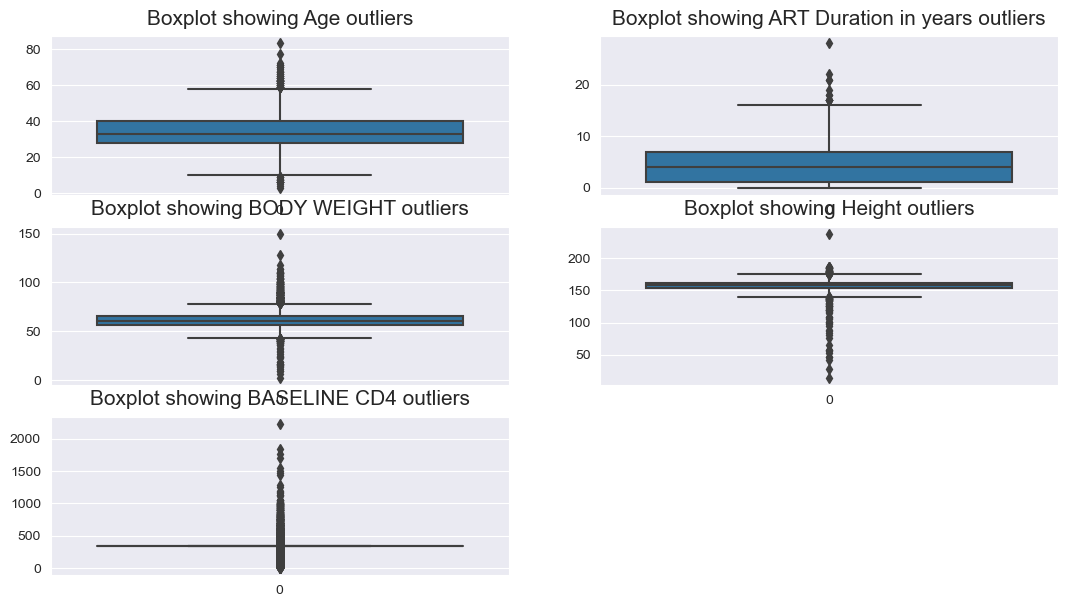

In [73]:
#checking for age
# Plotting boxplot for age
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
plt.subplot(3,2,1)
sns.boxplot(cc_df['Age'])
plt.title('Boxplot showing Age outliers', y = 1.02, fontsize = 15) 

#checking for duration on ART
# Plotting boxplot for weight
plt.subplot(3,2,2)
sns.boxplot(cc_df['ART_Duration'])
plt.title('Boxplot showing ART Duration in years outliers', y = 1.02, fontsize = 15) 

#checking for weight
# Plotting boxplot for weight
plt.subplot(3,2,3)
sns.boxplot(cc_df["BODY_WEIGHT"])
plt.title('Boxplot showing BODY WEIGHT outliers', y = 1.02, fontsize = 15)  

#checking for height
# Plotting boxplot for height
plt.subplot(3,2,4)
sns.boxplot(cc_df["Height(cm)"])
plt.title('Boxplot showing Height outliers', y = 1.02, fontsize = 15)  


#checking for baseline cd4 count
# Plotting boxplot for baseline cd4
plt.subplot(3,2,5)
sns.boxplot(cc_df["BASELINECD4"])
plt.title('Boxplot showing BASELINE CD4 outliers', y = 1.02, fontsize = 15)  
plt.show()

all the above plots indicated that there are outliers in those variable, 
which if not dealt with may affect our end resutls. 
this calls for imputation of the outliers without dropping them as we dont need to loose the data
The capping method was used as it imputes the outliers with other values like the mean, mode or median value.
Here we are going to replace the outliers with the upper and lower limit

In [74]:
##Using the capping method to impute the outliers for age


#calculating the quartiles and interquartile range
quant_75th= cc_df['Age'].quantile(0.75)
quant_25th= cc_df['Age'].quantile(0.25)

IQR = quant_75th - quant_25th

upper_limit= quant_75th + (1.5*IQR)
lower_limit= quant_75th - (1.5*IQR)



cc_df['Age']= np.where(cc_df['Age'] > upper_limit,upper_limit,

np.where(cc_df['Age'] < lower_limit,lower_limit,
        cc_df['Age']
        )                          
                          )

print(upper_limit, lower_limit)

58.0 22.0


In [75]:
##Using the capping method to impute the outliers for 


#calculating the quartiles and interquartile range
quant_75th= cc_df['ART_Duration'].quantile(0.75)
quant_25th= cc_df['ART_Duration'].quantile(0.25)

IQR = quant_75th - quant_25th

upper_limit= quant_75th + (1.5*IQR)
lower_limit= quant_75th - (1.5*IQR)



cc_df['ART_Duration']= np.where(cc_df['ART_Duration'] > upper_limit,upper_limit,

np.where(cc_df['ART_Duration'] < lower_limit,lower_limit,
        cc_df['ART_Duration']
        )                          
                          )

print(upper_limit, lower_limit)

16.0 -2.0


In [76]:
##Using the capping method to impute the outliers for body weight


#calculating the quartiles and interquartile range
quant_75th= cc_df['BODY_WEIGHT'].quantile(0.75)
quant_25th= cc_df['BODY_WEIGHT'].quantile(0.25)

IQR = quant_75th - quant_25th

upper_limit= quant_75th + (1.5*IQR)
lower_limit= quant_75th - (1.5*IQR)



cc_df['BODY_WEIGHT']= np.where(cc_df['BODY_WEIGHT'] > upper_limit,upper_limit,

np.where(cc_df['BODY_WEIGHT'] < lower_limit,lower_limit,
        cc_df['BODY_WEIGHT']
        )                          
                          )

print(upper_limit, lower_limit)

78.5 51.5


In [77]:
##Using the capping method to impute the outliers for height


#calculating the quartiles and interquartile range
quant_75th= cc_df['Height(cm)'].quantile(0.75)
quant_25th= cc_df['Height(cm)'].quantile(0.25)

IQR = quant_75th - quant_25th

upper_limit= quant_75th + (1.5*IQR)
lower_limit= quant_75th - (1.5*IQR)



cc_df['Height(cm)']= np.where(cc_df['Height(cm)'] > upper_limit,upper_limit,

np.where(cc_df['Height(cm)'] < lower_limit,lower_limit,
        cc_df['Height(cm)']
        )                          
                          )

print(upper_limit, lower_limit)

175.5 148.5


In [78]:
##Using the capping method to impute the outliers for baseline CD4 count


#calculating the quartiles and interquartile range
quant_75th= cc_df['BASELINECD4'].quantile(0.75)
quant_25th= cc_df['BASELINECD4'].quantile(0.25)

IQR = quant_75th - quant_25th

upper_limit= quant_75th + (1.5*IQR)
lower_limit= quant_75th - (1.5*IQR)



cc_df['BASELINECD4']= np.where(cc_df['BASELINECD4'] > upper_limit,upper_limit,

np.where(cc_df['BASELINECD4'] < lower_limit,lower_limit,
        cc_df['BASELINECD4']
        )                          
                          )

print(upper_limit, lower_limit)

336.0 336.0


In [79]:
#checking to confirm that the shape of the dataframe has not changed
cc_df.shape

(3025, 15)

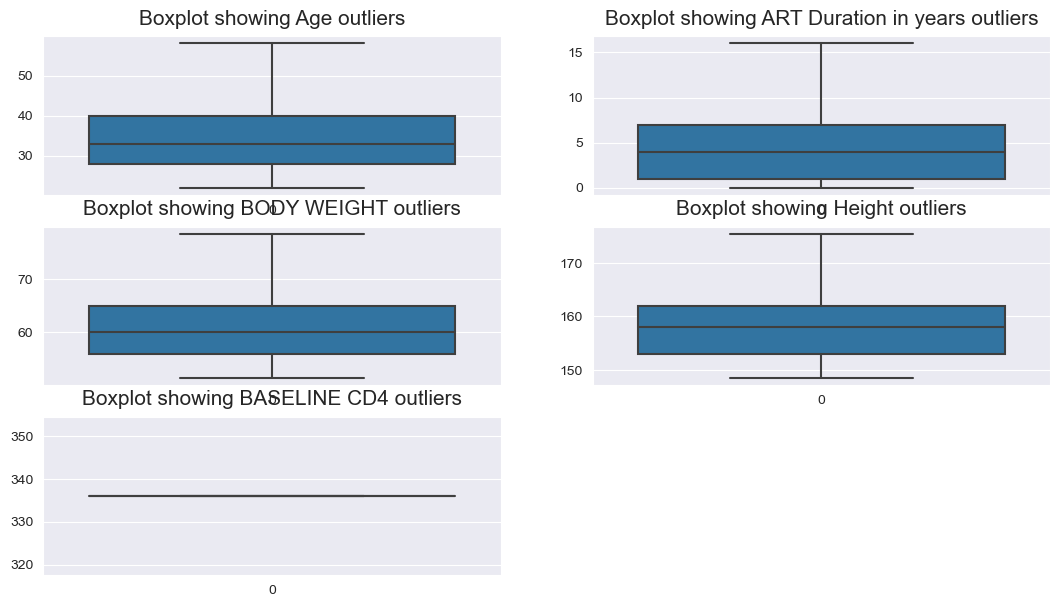

In [80]:
#confirming that there are no more outliers
#checking for age
# Plotting boxplot for age
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
plt.subplot(3,2,1)
sns.boxplot(cc_df['Age'])
plt.title('Boxplot showing Age outliers', y = 1.02, fontsize = 15) 

#checking for duration on ART
# Plotting boxplot for weight
plt.subplot(3,2,2)
sns.boxplot(cc_df['ART_Duration'])
plt.title('Boxplot showing ART Duration in years outliers', y = 1.02, fontsize = 15) 


#checking for weight
# Plotting boxplot for weigh
plt.subplot(3,2,3)
sns.boxplot(cc_df["BODY_WEIGHT"])
plt.title('Boxplot showing BODY WEIGHT outliers', y = 1.02, fontsize = 15)  

#checking for height
# Plotting boxplot for weight
plt.subplot(3,2,4)
sns.boxplot(cc_df["Height(cm)"])
plt.title('Boxplot showing Height outliers', y = 1.02, fontsize = 15)  


#checking for baseline cd4 count
# Plotting boxplot for baseline cd4
plt.subplot(3,2,5)
sns.boxplot(cc_df["BASELINECD4"])
plt.title('Boxplot showing BASELINE CD4 outliers', y = 1.02, fontsize = 15)  
plt.show()

In [81]:
cc_df.describe()

,Age,ART_Duration,BODY_WEIGHT,Height(cm),BASELINECD4,CC_SCREENING
count,3025.000000,3025.000000,3025.000000,3025.000000,3025.0,3025.000000
mean,34.636033,4.512727,61.641818,158.037025,336.0,0.027769
std,8.803151,3.599023,7.915970,6.441096,0.0,0.164336
min,22.000000,0.000000,51.500000,148.500000,336.0,0.000000
25%,28.000000,1.000000,56.000000,153.000000,336.0,0.000000
50%,33.000000,4.000000,60.000000,158.000000,336.0,0.000000
75%,40.000000,7.000000,65.000000,162.000000,336.0,0.000000
max,58.000000,16.000000,78.500000,175.500000,336.0,1.000000


# Adding a new variable Body Mass Index (BMI) calculated from weight and height
BMI =weght in kg/ hieght in m**2  . This can tell whether someone is over weight under weight or health/normal


In [82]:
cc_df['BMI'] = (cc_df['BODY_WEIGHT']/ (cc_df['Height(cm)']/100)**2 ).round(1)
cc_df.head()

,Age,ART_Duration,CURRENT_ARV_REGIMEN,METHOD_OF_FAMILY_PLANNING,TUBERCULOSIS_STATUS,ARV_ADHERENCE,WHO_HIV_CLINICAL_STAGE,BODY_WEIGHT,Height(cm),NutritionAssesment,TPT_STATUS,AdvancedDiseaseStatus,BASELINECD4,VIRAL_LOAD_QUALITATIVE,CC_SCREENING,BMI
0,35.0,9.0,1st line,no FP,no signs,Good,Clinical stage 1,51.5,175.5,NORMAL,Treatment complete,No Advanced Disease,336.0,NOT DETECTED,0,16.7
1,37.0,6.0,1st line,no FP,no signs,Good,Clinical stage 1,51.5,154.0,NORMAL,Treatment complete,No Advanced Disease,336.0,NOT DETECTED,0,21.7
2,47.0,6.0,1st line,no FP,no signs,Good,Clinical stage 1,60.0,148.5,NORMAL,Treatment complete,No Advanced Disease,336.0,NOT DETECTED,0,27.2
3,39.0,5.0,1st line,no FP,no signs,Good,Clinical stage 1,51.5,152.0,NORMAL,Treatment complete,No Advanced Disease,336.0,NOT DETECTED,1,22.3
4,35.0,6.0,1st line,hormonal,no signs,Good,Clinical stage 1,63.0,159.0,NORMAL,Treatment complete,No Advanced Disease,336.0,NOT DETECTED,0,24.9


In [83]:
#dropping columns weight and height
cc_df.drop(columns=['BODY_WEIGHT', 'Height(cm)'], inplace=True)

In [84]:
cc_df.head()

,Age,ART_Duration,CURRENT_ARV_REGIMEN,METHOD_OF_FAMILY_PLANNING,TUBERCULOSIS_STATUS,ARV_ADHERENCE,WHO_HIV_CLINICAL_STAGE,NutritionAssesment,TPT_STATUS,AdvancedDiseaseStatus,BASELINECD4,VIRAL_LOAD_QUALITATIVE,CC_SCREENING,BMI
0,35.0,9.0,1st line,no FP,no signs,Good,Clinical stage 1,NORMAL,Treatment complete,No Advanced Disease,336.0,NOT DETECTED,0,16.7
1,37.0,6.0,1st line,no FP,no signs,Good,Clinical stage 1,NORMAL,Treatment complete,No Advanced Disease,336.0,NOT DETECTED,0,21.7
2,47.0,6.0,1st line,no FP,no signs,Good,Clinical stage 1,NORMAL,Treatment complete,No Advanced Disease,336.0,NOT DETECTED,0,27.2
3,39.0,5.0,1st line,no FP,no signs,Good,Clinical stage 1,NORMAL,Treatment complete,No Advanced Disease,336.0,NOT DETECTED,1,22.3
4,35.0,6.0,1st line,hormonal,no signs,Good,Clinical stage 1,NORMAL,Treatment complete,No Advanced Disease,336.0,NOT DETECTED,0,24.9


# Checking for auto correlation for the numerical variables

In [85]:

feature_corr= abs(cc_df.corr()['CC_SCREENING']).sort_values(ascending = False)
feature_corr

CC_SCREENING    1.000000
ART_Duration    0.035263
BMI             0.033652
Age             0.025470
BASELINECD4          NaN
Name: CC_SCREENING, dtype: float64

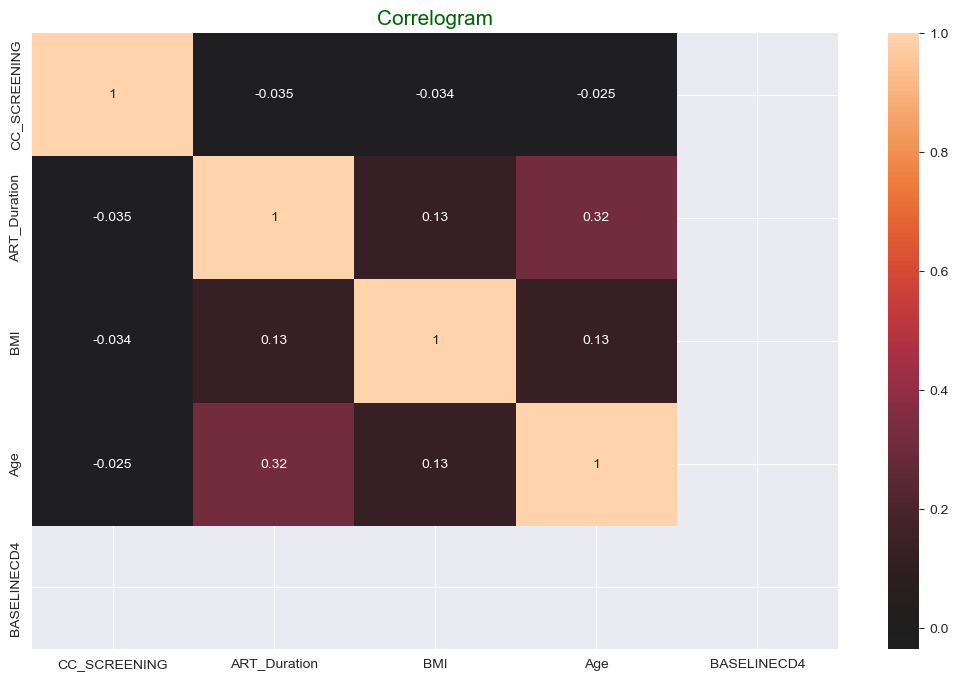

In [86]:
#Quantifying correlations between features
corr = cc_df[list(feature_corr.index)].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

From the heatmap, it can be observed that the features are not highly correlated among themselves as no feature as more than0.5 correlation coeffient.
thus we will keep all the features.
it can also be observed that Baseline CD4 count has no any impact on CC_screening and hence we will drop it

In [87]:
#dropping baseline CD4count
cc_df.drop(columns='BASELINECD4', inplace=True)

In [88]:
cc_df.columns

Index(['Age', 'ART_Duration', 'CURRENT_ARV_REGIMEN',
       'METHOD_OF_FAMILY_PLANNING', 'TUBERCULOSIS_STATUS', 'ARV_ADHERENCE',
       'WHO_HIV_CLINICAL_STAGE', 'NutritionAssesment', 'TPT_STATUS',
       'AdvancedDiseaseStatus', 'VIRAL_LOAD_QUALITATIVE', 'CC_SCREENING',
       'BMI'],
      dtype='object')

changing the datatype to categorical for qualitative variables so as to use category encoder to code for each category

In [89]:
cc_df["CURRENT_ARV_REGIMEN"] = cc_df["CURRENT_ARV_REGIMEN"].astype('category')
cc_df["METHOD_OF_FAMILY_PLANNING"] = cc_df["METHOD_OF_FAMILY_PLANNING"].astype('category')
cc_df["TUBERCULOSIS_STATUS"] = cc_df["TUBERCULOSIS_STATUS"].astype('category')
cc_df["ARV_ADHERENCE"] = cc_df["ARV_ADHERENCE"].astype('category')
cc_df["WHO_HIV_CLINICAL_STAGE"] = cc_df["WHO_HIV_CLINICAL_STAGE"].astype('category')
cc_df["NutritionAssesment"] = cc_df["NutritionAssesment"].astype('category')
cc_df["TPT_STATUS"] = cc_df["TPT_STATUS"].astype('category')
cc_df["AdvancedDiseaseStatus"] = cc_df["AdvancedDiseaseStatus"].astype('category')
cc_df["VIRAL_LOAD_QUALITATIVE"] = cc_df["VIRAL_LOAD_QUALITATIVE"].astype('category')

In [90]:
cc_df["CURRENT_ARV_REGIMEN"] = cc_df["CURRENT_ARV_REGIMEN"].cat.codes
cc_df["METHOD_OF_FAMILY_PLANNING"] = cc_df["METHOD_OF_FAMILY_PLANNING"].cat.codes
cc_df["TUBERCULOSIS_STATUS"] = cc_df["TUBERCULOSIS_STATUS"].cat.codes
cc_df["ARV_ADHERENCE"] = cc_df["ARV_ADHERENCE"].cat.codes
cc_df["WHO_HIV_CLINICAL_STAGE"] = cc_df["WHO_HIV_CLINICAL_STAGE"].cat.codes
cc_df["NutritionAssesment"] = cc_df["NutritionAssesment"].cat.codes
cc_df["TPT_STATUS"] = cc_df["TPT_STATUS"].cat.codes
cc_df["AdvancedDiseaseStatus"] = cc_df["AdvancedDiseaseStatus"].cat.codes
cc_df["VIRAL_LOAD_QUALITATIVE"] = cc_df["VIRAL_LOAD_QUALITATIVE"].cat.codes

In [91]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3025 non-null   float64
 1   ART_Duration               3025 non-null   float64
 2   CURRENT_ARV_REGIMEN        3025 non-null   int8   
 3   METHOD_OF_FAMILY_PLANNING  3025 non-null   int8   
 4   TUBERCULOSIS_STATUS        3025 non-null   int8   
 5   ARV_ADHERENCE              3025 non-null   int8   
 6   WHO_HIV_CLINICAL_STAGE     3025 non-null   int8   
 7   NutritionAssesment         3025 non-null   int8   
 8   TPT_STATUS                 3025 non-null   int8   
 9   AdvancedDiseaseStatus      3025 non-null   int8   
 10  VIRAL_LOAD_QUALITATIVE     3025 non-null   int8   
 11  CC_SCREENING               3025 non-null   int32  
 12  BMI                        3025 non-null   float64
dtypes: float64(3), int32(1), int8(9)
memory usage: 1

In [92]:
cc_df.describe()

,Age,ART_Duration,CURRENT_ARV_REGIMEN,METHOD_OF_FAMILY_PLANNING,TUBERCULOSIS_STATUS,ARV_ADHERENCE,WHO_HIV_CLINICAL_STAGE,NutritionAssesment,TPT_STATUS,AdvancedDiseaseStatus,VIRAL_LOAD_QUALITATIVE,CC_SCREENING,BMI
count,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,34.636033,4.512727,0.021818,0.457521,0.986777,1.000000,0.040331,1.003967,2.788760,1.000992,0.838017,0.027769,24.738380
std,8.803151,3.599023,0.146114,0.650293,0.166141,0.068041,0.272821,0.085202,0.669147,0.087206,0.368497,0.164336,3.314155
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.700000
25%,28.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,22.500000
50%,33.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,24.000000
75%,40.000000,7.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,26.700000
max,58.000000,16.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,1.000000,35.600000


# generating the descriptive statistics of the categrical variables using thr researchpy

In [93]:
#installing researchpy
#!pip install researchpy

In [94]:
#this will help in summarising the categorical variables
import researchpy as rp 


Cross tabulating each qualitative varable with the response variable

In [95]:
#current RAV regimen
rp.crosstab(cc_df['CURRENT_ARV_REGIMEN'], cc_df['CC_SCREENING'], prop= "cell")

CC_SCREENING              
CC_SCREENING                   0     1     All
CURRENT_ARV_REGIMEN                           
0                          95.11  2.71   97.82
1                           2.12  0.07    2.18
All                        97.22  2.78  100.00

In [96]:
#FP method
rp.crosstab(cc_df['METHOD_OF_FAMILY_PLANNING'], cc_df['CC_SCREENING'], prop= "cell")

CC_SCREENING              
CC_SCREENING                         0     1     All
METHOD_OF_FAMILY_PLANNING                           
0                                61.29  1.69   62.98
1                                27.44  0.86   28.30
2                                 8.50  0.23    8.73
All                              97.22  2.78  100.00

In [97]:
#TB status
rp.crosstab(cc_df['TUBERCULOSIS_STATUS'], cc_df['CC_SCREENING'], prop= "cell")

CC_SCREENING              
CC_SCREENING                   0     1     All
TUBERCULOSIS_STATUS                           
0                           2.05  0.00    2.05
1                          94.48  2.74   97.22
2                           0.69  0.03    0.73
All                        97.22  2.78  100.00

In [98]:
#ART adherence
rp.crosstab(cc_df['ARV_ADHERENCE'], cc_df['CC_SCREENING'], prop= "cell")

CC_SCREENING              
CC_SCREENING             0     1     All
ARV_ADHERENCE                           
0                     0.23  0.00    0.23
1                    96.76  2.78   99.54
2                     0.23  0.00    0.23
All                  97.22  2.78  100.00

In [99]:
#WHO clinical stage
rp.crosstab(cc_df['WHO_HIV_CLINICAL_STAGE'], cc_df['CC_SCREENING'], prop= "cell")

CC_SCREENING              
CC_SCREENING                      0     1     All
WHO_HIV_CLINICAL_STAGE                           
0                             94.71  2.64   97.36
1                              1.62  0.03    1.65
2                              0.56  0.03    0.60
3                              0.33  0.07    0.40
All                           97.22  2.78  100.00

In [100]:
#Nutriton assessment
rp.crosstab(cc_df['NutritionAssesment'], cc_df['CC_SCREENING'], prop= "cell")

CC_SCREENING              
CC_SCREENING                  0     1     All
NutritionAssesment                           
0                          0.17  0.00    0.17
1                         96.50  2.78   99.27
2                          0.56  0.00    0.56
All                       97.22  2.78  100.00

In [101]:
#TPT status
rp.crosstab(cc_df['TPT_STATUS'], cc_df['CC_SCREENING'], prop= "cell")

CC_SCREENING              
CC_SCREENING            0     1     All
TPT_STATUS                             
0                    2.48  0.13    2.61
1                    5.95  0.26    6.21
2                    0.83  0.03    0.86
3                   87.97  2.35   90.31
All                 97.22  2.78  100.00

In [102]:
#advanced disease status
rp.crosstab(cc_df['AdvancedDiseaseStatus'], cc_df['CC_SCREENING'], prop= "cell")

CC_SCREENING              
CC_SCREENING                     0     1     All
AdvancedDiseaseStatus                           
0                             0.33  0.00    0.33
1                            96.46  2.78   99.24
2                             0.43  0.00    0.43
All                          97.22  2.78  100.00

In [103]:
#Viral load status status
rp.crosstab(cc_df['VIRAL_LOAD_QUALITATIVE'], cc_df['CC_SCREENING'], prop= "cell")

CC_SCREENING             
CC_SCREENING                      0     1    All
VIRAL_LOAD_QUALITATIVE                          
0                             15.67  0.53   16.2
1                             81.55  2.25   83.8
All                           97.22  2.78  100.0

In [104]:
#summary of the quantitative variables
#rp.summary_cat(cc_df[['CURRENT_ARV_REGIMEN','METHOD_OF_FAMILY_PLANNING', 'TUBERCULOSIS_STATUS', 'ARV_ADHERENCE','WHO_HIV_CLINICAL_STAGE', 'NutritionAssesment', 'TPT_STATUS','AdvancedDiseaseStatus', 'VIRAL_LOAD_QUALITATIVE', 'CC_SCREENING']])



In [105]:
#for numerical
rp.summarize(cc_df[['Age', 'ART_Duration', 
       'BMI']])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,Age,3025,34.636,33.0,77.4955,8.8032,0.1601,Age
1,ART_Duration,3025,4.5127,4.0,12.953,3.599,0.0654,ART_Duration
2,BMI,3025,24.7384,24.0,10.9836,3.3142,0.0603,BMI


In [106]:
rp.summarize(cc_df.groupby("CC_SCREENING")['Age'])

,CC_SCREENING,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,0,2941,34.6739,33.0,77.7845,8.8195,0.1626,"[34.355, 34.9928]"
1,1,84,33.3095,33.0,66.3609,8.1462,0.8888,"[31.5417, 35.0774]"


In [107]:
rp.summarize(cc_df.groupby("CC_SCREENING")['ART_Duration'])

,CC_SCREENING,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,0,2941,4.5342,4.0,12.9734,3.6019,0.0664,"[4.4039, 4.6644]"
1,1,84,3.7619,2.5,11.7980,3.4348,0.3748,"[3.0165, 4.5073]"


In [108]:
rp.summarize(cc_df.groupby("CC_SCREENING")['BMI'])

,CC_SCREENING,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,0,2941,24.7572,24.00,11.0022,3.3170,0.0612,"[24.6373, 24.8772]"
1,1,84,24.0786,23.65,10.0060,3.1632,0.3451,"[23.3921, 24.765]"


calculating the corresponding Interquartile range

In [109]:
#for age
No_evidence_Malignancy= cc_df[cc_df['CC_SCREENING']==0]
#Calculating the IQR of class 0
quartiles = No_evidence_Malignancy['Age'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print('class 0,25% : ',quartiles[0.25])
print('class 0,75% : ',quartiles[0.75])
print('class 0 iqr : ',iqr)

Sus_Malignancy= cc_df[cc_df['CC_SCREENING']==1]
#Calculating the IQR of class 1
quartiles = Sus_Malignancy['Age'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print('class 1,25% : ',quartiles[0.25])
print('class 1,75% : ',quartiles[0.75])

print('class1 iqr : ',iqr)

#Calculating the IQR of the overall
quartiles = cc_df['Age'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print('overall: ',quartiles[0.25])
print('overall: ',quartiles[0.75])
print('overall iqr: ',iqr)

class 0,25% :  28.0
class 0,75% :  40.0
class 0 iqr :  12.0
class 1,25% :  26.75
class 1,75% :  38.25
class1 iqr :  11.5
overall:  28.0
overall:  40.0
overall iqr:  12.0


In [110]:
#for ART duration
No_evidence_Malignancy= cc_df[cc_df['CC_SCREENING']==0]
#Calculating the IQR of class 0
quartiles = No_evidence_Malignancy['ART_Duration'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print('class 0,25% : ',quartiles[0.25])
print('class 0,75% : ',quartiles[0.75])
print('class0 iqr: ',iqr)

Sus_Malignancy= cc_df[cc_df['CC_SCREENING']==1]
#Calculating the IQR of class 1
quartiles = Sus_Malignancy['ART_Duration'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print('class 1,25% : ',quartiles[0.25])
print('class 1,75% : ',quartiles[0.75])
print('class1 iqr: ',iqr)

#Calculating the IQR of overall
quartiles = cc_df['ART_Duration'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print('overall: ',quartiles[0.25])
print('overall: ',quartiles[0.75])
print('overall iqr: ',iqr)

class 0,25% :  1.0
class 0,75% :  7.0
class0 iqr:  6.0
class 1,25% :  1.0
class 1,75% :  6.25
class1 iqr:  5.25
overall:  1.0
overall:  7.0
overall iqr:  6.0


In [111]:
#for BMI
No_evidence_Malignancy= cc_df[cc_df['CC_SCREENING']==0]
#Calculating the IQR of class 0
quartiles = No_evidence_Malignancy['BMI'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print('class 0,25% : ',quartiles[0.25])
print('class 0,75% : ',quartiles[0.75])
print('class 0 iqr: ',iqr)

Sus_Malignancy= cc_df[cc_df['CC_SCREENING']==1]
#Calculating the IQR of class 1
quartiles = Sus_Malignancy['BMI'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print('class 1,25% : ',quartiles[0.25])
print('class 1,75% : ',quartiles[0.75])
print('class1 iqr: ',iqr)

#Calculating the IQR of overall
quartiles = cc_df['BMI'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print('overall: ',quartiles[0.25])
print('overall: ',quartiles[0.75])
print('overall iqr: ',iqr)

class 0,25% :  22.5
class 0,75% :  26.7
class 0 iqr:  4.199999999999999
class 1,25% :  22.2
class 1,75% :  25.625
class1 iqr:  3.4250000000000007
overall:  22.5
overall:  26.7
overall iqr:  4.199999999999999


# Balancing the dataset fot the target variable

In [112]:
Sus_Malignancy= cc_df[cc_df['CC_SCREENING']==1]

No_evidence_Malignancy= cc_df[cc_df['CC_SCREENING']==0]
print(Sus_Malignancy.shape, No_evidence_Malignancy.shape)

(84, 13) (2941, 13)


It can be observed that the target classes are highly imbalanced and thus we will use the SMOTETomek as suggested to overcome the imbalance

In [113]:
#separeting for x and y
x= cc_df.drop(columns= 'CC_SCREENING')
y=cc_df['CC_SCREENING']

In [114]:
x.shape, y.shape

((3025, 12), (3025,))

In [115]:
#importing the necesarry libraries
#SMOTETomek combines both oversampling and under sampling
from imblearn.combine import SMOTETomek #this will resample the data
smote_omek = SMOTETomek(random_state=40)
x_res,y_res= smote_omek.fit_resample(x,y)

In [116]:
#checking for their shapes
x_res.shape,y_res.shape

((5812, 12), (5812,))

In [117]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 2941, 1: 84})
Resampled dataset shape Counter({0: 2906, 1: 2906})


Text(0, 0.5, 'Class Percentage')

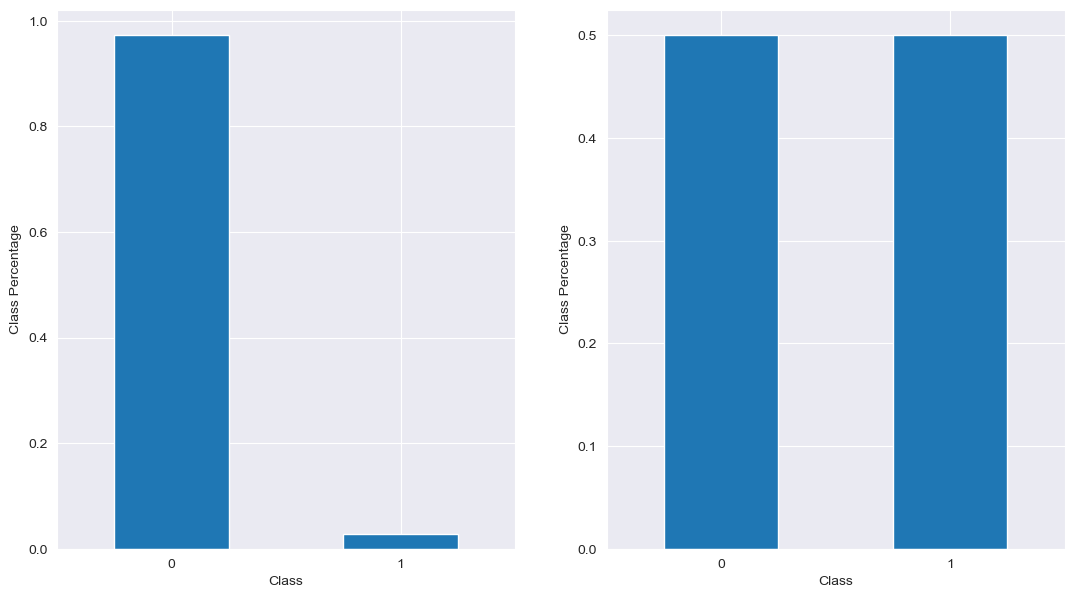

In [118]:
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
plt.subplot(1,2,1)
#first visualizing the distribution of the target class
LABELS= ['No evidence of Malignancy', 'Suspicious of Malignancy']
cc_df['CC_SCREENING'].value_counts(normalize=True).plot(kind='bar',x=LABELS, rot=0)
plt.xlabel("Class")

plt.ylabel("Class Percentage")
plt.subplot(1,2,2)




#first visualizing the distribution of the target class
y_res.value_counts(normalize = True).plot(kind= 'bar', x=LABELS, rot=0)
#plt.title('CERVICAL CANCER SCREENING CLASS DISTRIBUTION')
#LABELS= ['No evidence of Malignancy', 'Suspicious of Malignancy']
#plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Class Percentage")

In [119]:
#splitting the data into test and train sets
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

combining the balanced dataset to be used in the logistic regression analysis

In [120]:
result = pd.concat([x_res, y_res], axis=1)
result.to_excel('balanceddataset.xlsx')
result.head()

,Age,ART_Duration,CURRENT_ARV_REGIMEN,METHOD_OF_FAMILY_PLANNING,TUBERCULOSIS_STATUS,ARV_ADHERENCE,WHO_HIV_CLINICAL_STAGE,NutritionAssesment,TPT_STATUS,AdvancedDiseaseStatus,VIRAL_LOAD_QUALITATIVE,BMI,CC_SCREENING
0,35.0,9.0,0,1,1,1,0,1,3,1,1,16.7,0
1,37.0,6.0,0,1,1,1,0,1,3,1,1,21.7,0
2,47.0,6.0,0,1,1,1,0,1,3,1,1,27.2,0
3,39.0,5.0,0,1,1,1,0,1,3,1,1,22.3,1
4,35.0,6.0,0,0,1,1,0,1,3,1,1,24.9,0


# FEATURE ENGINEERING

Checking for multicollinearity

In [121]:
#Importing VIF library
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(v):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = v.columns
    vif["VIF"] = [variance_inflation_factor(v.values, i) for i in range(v.shape[1])]

    return(vif)

In [122]:
v = x_res.iloc[:,:]
calc_vif(v)

,variables,VIF
0,Age,22.434229
1,ART_Duration,2.998947
2,CURRENT_ARV_REGIMEN,1.019936
3,METHOD_OF_FAMILY_PLANNING,1.568488
4,TUBERCULOSIS_STATUS,63.696608
5,ARV_ADHERENCE,270.403263
6,WHO_HIV_CLINICAL_STAGE,1.105885
7,NutritionAssesment,202.191133
8,TPT_STATUS,16.840567
9,AdvancedDiseaseStatus,202.802387


since age,TB status, ARV adherence, nutrition status, advanced disease status and BMI have high VIF (>10) values, this implies that they can be predicted by other independent variables in the dataset,
thus thwy will not be included in a logistic regression as they violet the no multicollinearity assumption

# USING LOGISTIC REGRESSION

##considering the balanced dataset

Univariate analysis

In [123]:
#importing the statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

mylogit = smf.logit(formula = 'CC_SCREENING ~ ART_Duration', data = result).fit()
mylogit.summary()

Optimization terminated successfully.
         Current function value: 0.683544
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CC_SCREENING   No. Observations:                 5812
Model:                          Logit   Df Residuals:                     5810
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                 0.01385
Time:                        16:42:31   Log-Likelihood:                -3972.8
converged:                       True   LL-Null:                       -4028.6
Covariance Type:            nonrobust   LLR p-value:                 4.312e-26
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3360      0.042      8.091      0.000       0.255       0.417
ART_Duration    -0.0829      0.008    -10.426      0.000      -0.099      -0.067
================================================================================
"""

In [124]:
params = mylogit.params
conf = mylogit.conf_int()
conf['COR'] = params
conf.columns = ['5%', '95%', 'COR']
print(np.exp(conf))

                    5%       95%       COR
Intercept     1.289916  1.517906  1.399275
ART_Duration  0.906156  0.934863  0.920398


In [125]:
#importing the statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

mylogit = smf.logit(formula = 'CC_SCREENING ~ C(CURRENT_ARV_REGIMEN)', data = result).fit()
mylogit.summary()

Optimization terminated successfully.
         Current function value: 0.686760
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CC_SCREENING   No. Observations:                 5812
Model:                          Logit   Df Residuals:                     5810
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                0.009214
Time:                        16:42:31   Log-Likelihood:                -3991.5
converged:                       True   LL-Null:                       -4028.6
Covariance Type:            nonrobust   LLR p-value:                 6.919e-18
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0216      0.026      0.818      0.413      -0.030       0.073
C(CURRENT_ARV_REGIMEN)[T.1]    -3.4873      0.719     -4.853      0.000      -4.896      -2.079
===============================================================================================
"""

In [126]:
params = mylogit.params
conf = mylogit.conf_int()
conf['COR'] = params
conf.columns = ['5%', '95%', 'COR']
print(np.exp(conf))

                                   5%       95%       COR
Intercept                    0.970315  1.076050  1.021816
C(CURRENT_ARV_REGIMEN)[T.1]  0.007479  0.125058  0.030583


In [127]:
#importing the statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

mylogit = smf.logit(formula = 'CC_SCREENING ~ C(METHOD_OF_FAMILY_PLANNING)', data = result).fit()
mylogit.summary()

Optimization terminated successfully.
         Current function value: 0.673059
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CC_SCREENING   No. Observations:                 5812
Model:                          Logit   Df Residuals:                     5809
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                 0.02898
Time:                        16:42:31   Log-Likelihood:                -3911.8
converged:                       True   LL-Null:                       -4028.6
Covariance Type:            nonrobust   LLR p-value:                 1.971e-51
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.2029      0.032      6.435      0.000       0.141       0.265
C(METHOD_OF_FAMILY_PLANNING)[T.1]    -0.4801      0.062     -7.772      0.000      -0.601      -0.359
C(METHOD_OF_FAMILY_PLANNING)[T.2]    -1.9453      0.165    -11.815      0.000      -2.268      -1.623
=====================================================================================================
"""

In [128]:
params = mylogit.params
conf = mylogit.conf_int()
conf['COR'] = params
conf.columns = ['5%', '95%', 'COR']
print(np.exp(conf))

                                         5%       95%       COR
Intercept                          1.151550  1.303048  1.224959
C(METHOD_OF_FAMILY_PLANNING)[T.1]  0.548168  0.698354  0.618721
C(METHOD_OF_FAMILY_PLANNING)[T.2]  0.103517  0.197380  0.142941


In [129]:
#importing the statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

mylogit = smf.logit(formula = 'CC_SCREENING ~ C(WHO_HIV_CLINICAL_STAGE)', data = result).fit()
mylogit.summary()

Optimization terminated successfully.
         Current function value: 0.692555
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CC_SCREENING   No. Observations:                 5812
Model:                          Logit   Df Residuals:                     5808
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:               0.0008543
Time:                        16:42:31   Log-Likelihood:                -4025.1
converged:                       True   LL-Null:                       -4028.6
Covariance Type:            nonrobust   LLR p-value:                   0.07572
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.0007      0.027     -0.027      0.979      -0.053       0.051
C(WHO_HIV_CLINICAL_STAGE)[T.1]     0.0792      0.200      0.396      0.692      -0.313       0.471
C(WHO_HIV_CLINICAL_STAGE)[T.2]     0.3030      0.321      0.944      0.345      -0.326       0.932
C(WHO_HIV_CLINICAL_STAGE)[T.3]    -1.6087      0.775     -2.076      0.038      -3.128      -0.090
==================================================================================================
"""

In [130]:
params = mylogit.params
conf = mylogit.conf_int()
conf['COR'] = params
conf.columns = ['5%', '95%', 'COR']
print(np.exp(conf))

                                      5%       95%       COR
Intercept                       0.948551  1.052750  0.999293
C(WHO_HIV_CLINICAL_STAGE)[T.1]  0.731447  1.601736  1.082398
C(WHO_HIV_CLINICAL_STAGE)[T.2]  0.721760  2.539679  1.353898
C(WHO_HIV_CLINICAL_STAGE)[T.3]  0.043814  0.914246  0.200141


In [131]:
#importing the statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

mylogit = smf.logit(formula = 'CC_SCREENING ~ +C(TPT_STATUS)', data = result).fit()
mylogit.summary()

Optimization terminated successfully.
         Current function value: 0.671561
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CC_SCREENING   No. Observations:                 5812
Model:                          Logit   Df Residuals:                     5808
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                 0.03114
Time:                        16:42:31   Log-Likelihood:                -3903.1
converged:                       True   LL-Null:                       -4028.6
Covariance Type:            nonrobust   LLR p-value:                 4.151e-54
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.124e-14      0.163  -3.14e-13      1.000      -0.320       0.320
C(TPT_STATUS)[T.1]     0.6051      0.188      3.218      0.001       0.237       0.974
C(TPT_STATUS)[T.2]     2.2201      0.270      8.225      0.000       1.691       2.749
C(TPT_STATUS)[T.3]    -0.1407      0.166     -0.849      0.396      -0.466       0.184
======================================================================================
"""

In [132]:
params = mylogit.params
conf = mylogit.conf_int()
conf['COR'] = params
conf.columns = ['5%', '95%', 'COR']
print(np.exp(conf))

                          5%        95%       COR
Intercept           0.726105   1.377211  1.000000
C(TPT_STATUS)[T.1]  1.266932   2.647536  1.831461
C(TPT_STATUS)[T.2]  5.425284  15.629302  9.208333
C(TPT_STATUS)[T.3]  0.627753   1.202327  0.868771


In [133]:
#importing the statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

mylogit = smf.logit(formula = 'CC_SCREENING ~ C(VIRAL_LOAD_QUALITATIVE)', data = result).fit()
mylogit.summary()

Optimization terminated successfully.
         Current function value: 0.675769
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CC_SCREENING   No. Observations:                 5812
Model:                          Logit   Df Residuals:                     5810
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                 0.02507
Time:                        16:42:31   Log-Likelihood:                -3927.6
converged:                       True   LL-Null:                       -4028.6
Covariance Type:            nonrobust   LLR p-value:                 7.644e-46
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.6793      0.056     12.048      0.000       0.569       0.790
C(VIRAL_LOAD_QUALITATIVE)[T.1]    -0.8895      0.064    -13.896      0.000      -1.015      -0.764
==================================================================================================
"""

In [134]:
params = mylogit.params
conf = mylogit.conf_int()
conf['COR'] = params
conf.columns = ['5%', '95%', 'COR']
print(np.exp(conf))

                                      5%       95%       COR
Intercept                       1.766195  2.203068  1.972574
C(VIRAL_LOAD_QUALITATIVE)[T.1]  0.362411  0.465777  0.410856


In [135]:
#importing the statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

mylogit = smf.logit(formula = 'CC_SCREENING ~ Age', data = result).fit()
mylogit.summary()

Optimization terminated successfully.
         Current function value: 0.687862
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CC_SCREENING   No. Observations:                 5812
Model:                          Logit   Df Residuals:                     5810
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                0.007625
Time:                        16:42:31   Log-Likelihood:                -3997.9
converged:                       True   LL-Null:                       -4028.6
Covariance Type:            nonrobust   LLR p-value:                 4.566e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8395      0.111      7.561      0.000       0.622       1.057
Age           -0.0248      0.003     -7.774      0.000      -0.031      -0.019
==============================================================================
"""

In [136]:
params = mylogit.params
conf = mylogit.conf_int()
conf['COR'] = params
conf.columns = ['5%', '95%', 'COR']
print(np.exp(conf))

                 5%       95%       COR
Intercept  1.862486  2.878256  2.315321
Age        0.969387  0.981601  0.975475


In [137]:
#importing the statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

mylogit = smf.logit(formula = 'CC_SCREENING ~ BMI', data = result).fit()
mylogit.summary()

Optimization terminated successfully.
         Current function value: 0.685307
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CC_SCREENING   No. Observations:                 5812
Model:                          Logit   Df Residuals:                     5810
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                 0.01131
Time:                        16:42:31   Log-Likelihood:                -3983.0
converged:                       True   LL-Null:                       -4028.6
Covariance Type:            nonrobust   LLR p-value:                 1.344e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0378      0.218      9.352      0.000       1.611       2.465
BMI           -0.0836      0.009     -9.413      0.000      -0.101      -0.066
==============================================================================
"""

In [138]:
params = mylogit.params
conf = mylogit.conf_int()
conf['COR'] = params
conf.columns = ['5%', '95%', 'COR']
print(np.exp(conf))

                 5%        95%       COR
Intercept  5.006557  11.762328  7.673902
BMI        0.903921   0.935947  0.919795


In [139]:
#importing the statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

mylogit = smf.logit(formula = 'CC_SCREENING ~ C(TUBERCULOSIS_STATUS)', data = result).fit()
mylogit.summary()

         Current function value: 0.683728
         Iterations: 35


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CC_SCREENING   No. Observations:                 5812
Model:                          Logit   Df Residuals:                     5809
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                 0.01359
Time:                        16:42:31   Log-Likelihood:                -3973.8
converged:                      False   LL-Null:                       -4028.6
Covariance Type:            nonrobust   LLR p-value:                 1.680e-24
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -19.4400   2114.185     -0.009      0.993   -4163.166    4124.286
C(TUBERCULOSIS_STATUS)[T.1]    19.4686   2114.185      0.009      0.993   -4124.257    4163.195
C(TUBERCULOSIS_STATUS)[T.2]    16.3955   2114.185      0.008      0.994   -4127.331    4160.122
===============================================================================================
"""

In [140]:
params = mylogit.params
conf = mylogit.conf_int()
conf['COR'] = params
conf.columns = ['5%', '95%', 'COR']
print(np.exp(conf))

                              5%  95%           COR
Intercept                    0.0  inf  3.608470e-09
C(TUBERCULOSIS_STATUS)[T.1]  0.0  inf  2.851755e+08
C(TUBERCULOSIS_STATUS)[T.2]  0.0  inf  1.319646e+07


In [141]:
#importing the statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

mylogit = smf.logit(formula = 'CC_SCREENING ~ C(ARV_ADHERENCE)', data = result).fit()
mylogit.summary()

         Current function value: 0.691475
         Iterations: 35


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CC_SCREENING   No. Observations:                 5812
Model:                          Logit   Df Residuals:                     5809
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                0.002413
Time:                        16:42:31   Log-Likelihood:                -4018.9
converged:                      False   LL-Null:                       -4028.6
Covariance Type:            nonrobust   LLR p-value:                 6.001e-05
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -22.3542    2.7e+04     -0.001      0.999    -5.3e+04    5.29e+04
C(ARV_ADHERENCE)[T.1]    22.3591    2.7e+04      0.001      0.999   -5.29e+04     5.3e+04
C(ARV_ADHERENCE)[T.2]     2.4107   2.82e+04   8.55e-05      1.000   -5.53e+04    5.53e+04
=========================================================================================
"""

In [142]:
params = mylogit.params
conf = mylogit.conf_int()
conf['COR'] = params
conf.columns = ['5%', '95%', 'COR']
print(np.exp(conf))

                        5%  95%           COR
Intercept              0.0  inf  1.957389e-10
C(ARV_ADHERENCE)[T.1]  0.0  inf  5.133577e+09
C(ARV_ADHERENCE)[T.2]  0.0  inf  1.114144e+01


In [143]:
#importing the statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

mylogit = smf.logit(formula = 'CC_SCREENING ~ C(NutritionAssesment)', data = result).fit()
mylogit.summary()

Optimization terminated successfully.
         Current function value: 0.690516
         Iterations 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CC_SCREENING   No. Observations:                 5812
Model:                          Logit   Df Residuals:                     5809
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                0.003796
Time:                        16:42:31   Log-Likelihood:                -4013.3
converged:                       True   LL-Null:                       -4028.6
Covariance Type:            nonrobust   LLR p-value:                 2.287e-07
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -35.5091        nan        nan        nan         nan         nan
C(NutritionAssesment)[T.1]    35.5167        nan        nan        nan         nan         nan
C(NutritionAssesment)[T.2]   -32.4074         -0        inf      0.000     -32.407     -32.407
==============================================================================================
"""

In [144]:
params = mylogit.params
conf = mylogit.conf_int()
conf['COR'] = params
conf.columns = ['5%', '95%', 'COR']
print(np.exp(conf))

                                      5%           95%           COR
Intercept                            NaN           NaN  3.789416e-16
C(NutritionAssesment)[T.1]           NaN           NaN  2.659060e+15
C(NutritionAssesment)[T.2]  8.426738e-15  8.426738e-15  8.426738e-15


In [145]:
#importing the statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

mylogit = smf.logit(formula = 'CC_SCREENING ~ C(AdvancedDiseaseStatus)', data = result).fit()
mylogit.summary()

         Current function value: 0.690396
         Iterations: 35


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CC_SCREENING   No. Observations:                 5812
Model:                          Logit   Df Residuals:                     5809
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                0.003969
Time:                        16:42:31   Log-Likelihood:                -4012.6
converged:                      False   LL-Null:                       -4028.6
Covariance Type:            nonrobust   LLR p-value:                 1.139e-07
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -24.3489   6.13e+04     -0.000      1.000    -1.2e+05     1.2e+05
C(AdvancedDiseaseStatus)[T.1]    24.3568   6.13e+04      0.000      1.000    -1.2e+05     1.2e+05
C(AdvancedDiseaseStatus)[T.2]    -8.3208   3.45e+06  -2.42e-06      1.000   -6.75e+06    6.75e+06
=================================================================================================
"""

In [146]:
params = mylogit.params
conf = mylogit.conf_int()
conf['COR'] = params
conf.columns = ['5%', '95%', 'COR']
print(np.exp(conf))

                                5%  95%           COR
Intercept                      0.0  inf  2.663260e-11
C(AdvancedDiseaseStatus)[T.1]  0.0  inf  3.784752e+10
C(AdvancedDiseaseStatus)[T.2]  0.0  inf  2.434066e-04


Multivariate analysis

In [147]:
#importing the statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

mylogit = smf.logit(formula = 'CC_SCREENING ~ ART_Duration + C(CURRENT_ARV_REGIMEN) + C(METHOD_OF_FAMILY_PLANNING)+ C(WHO_HIV_CLINICAL_STAGE) +C(TPT_STATUS) + C(VIRAL_LOAD_QUALITATIVE)', data = result).fit()
mylogit.summary()

Optimization terminated successfully.
         Current function value: 0.631985
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           CC_SCREENING   No. Observations:                 5812
Model:                          Logit   Df Residuals:                     5800
Method:                           MLE   Df Model:                           11
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                 0.08824
Time:                        16:42:32   Log-Likelihood:                -3673.1
converged:                       True   LL-Null:                       -4028.6
Covariance Type:            nonrobust   LLR p-value:                2.421e-145
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.6707      0.178      3.767      0.000       0.322       1.020
C(CURRENT_ARV_REGIMEN)[T.1]          -3.6198      0.725     -4.990      0.000      -5.042      -2.198
C(METHOD_OF_FAMILY_PLANNING)[T.1]    -0.3792      0.065     -5.837      0.000      -0.507      -0.252
C(METHOD_OF_FAMILY_PLANNING)[T.2]    -1.7982      0.168    -10.678      0.000      -2.128      -1.468
C(WHO_HIV_CLINICAL_STAGE)[T.1]       -0.1254      0.214     -0.587      0.557      -0.544       0.293
C(WHO_HIV_CLINICAL_STAGE)[T.2]        0.1156      0.342      0.338      0.735      -0.555       0.786
C(WHO_HIV_CLINICAL_STAGE)[T.3]       -1.9046      0.811     -2.348      0.019      -3.495      -0.315
C(TPT_STATUS)[T.1]                    0.7016      0.197      3.570      0.000       0.316       1.087
C(TPT_STATUS)[T.2]                    2.2815      0.279      8.176      0.000       1.735       2.828
C(TPT_STATUS)[T.3]                    0.2308      0.177      1.305      0.192      -0.116       0.577
C(VIRAL_LOAD_QUALITATIVE)[T.1]       -0.8237      0.069    -11.932      0.000      -0.959      -0.688
ART_Duration                         -0.0413      0.009     -4.666      0.000      -0.059      -0.024
=====================================================================================================
"""

In [148]:
params = mylogit.params
conf = mylogit.conf_int()
conf['AOR'] = params
conf.columns = ['5%', '95%', 'AOR']
print(np.exp(conf))

                                         5%        95%       AOR
Intercept                          1.379542   2.771955  1.955512
C(CURRENT_ARV_REGIMEN)[T.1]        0.006463   0.111028  0.026788
C(METHOD_OF_FAMILY_PLANNING)[T.1]  0.602542   0.777328  0.684378
C(METHOD_OF_FAMILY_PLANNING)[T.2]  0.119039   0.230348  0.165591
C(WHO_HIV_CLINICAL_STAGE)[T.1]     0.580348   1.340836  0.882129
C(WHO_HIV_CLINICAL_STAGE)[T.2]     0.574258   2.194227  1.122521
C(WHO_HIV_CLINICAL_STAGE)[T.3]     0.030361   0.730058  0.148880
C(TPT_STATUS)[T.1]                 1.372237   2.964578  2.016954
C(TPT_STATUS)[T.2]                 5.666787  16.919582  9.791816
C(TPT_STATUS)[T.3]                 0.890704   1.781193  1.259570
C(VIRAL_LOAD_QUALITATIVE)[T.1]     0.383295   0.502400  0.438825
ART_Duration                       0.943098   0.976358  0.959584


# RECURSIVE FEATURE ELIMINATION (RFE)

>2 0.951 (0.009)
>3 0.953 (0.012)
>4 0.958 (0.009)
>5 0.958 (0.009)
>6 0.958 (0.010)
>7 0.959 (0.010)
>8 0.959 (0.008)
>9 0.961 (0.009)
>10 0.960 (0.008)
>11 0.960 (0.008)
>12 0.960 (0.009)


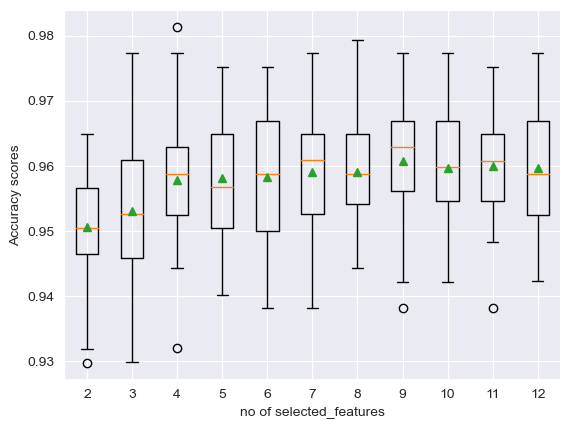

In [149]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
 
# get the dataset
def get_dataset():
    X = x_res
    y= y_res
   
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 13):
        rfe = RFE(estimator= RandomForestClassifier(n_estimators=100,random_state=42), n_features_to_select=i)
        model =  RandomForestClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
#evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=12, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel("no of selected_features")
plt.ylabel("Accuracy scores")
plt.show()

In [150]:
# define RFE
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100,random_state=42), n_features_to_select=7 )

# fit RFE
rfe.fit(x_res, y_res)
# summarize all features
#for i in range(X.shape[1]):
for i, col in zip(range(x_res.shape[1]), x_res.columns):
     print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")
    #print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))# define RFE



Age selected=True rank=1
ART_Duration selected=True rank=1
CURRENT_ARV_REGIMEN selected=False rank=2
METHOD_OF_FAMILY_PLANNING selected=True rank=1
TUBERCULOSIS_STATUS selected=False rank=3
ARV_ADHERENCE selected=False rank=5
WHO_HIV_CLINICAL_STAGE selected=True rank=1
NutritionAssesment selected=False rank=4
TPT_STATUS selected=True rank=1
AdvancedDiseaseStatus selected=False rank=6
VIRAL_LOAD_QUALITATIVE selected=True rank=1
BMI selected=True rank=1


From the RFE with RF, the selection of 7 features were achieving the highest score than choosing any other number of features.
the chosen features here include; age,ART dration, FP method, TB status, WHO stage, TPT status, Viral load and BMI

# MODELLING WITH LOGISTIC REGRESSION SELECTED FEATURES

we will use the k fold cross validation in trainig and testing for our models as it checks for overfitting

In [151]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv= KFold(10)

In [152]:
#dropping the features that were not significant on both the train and test sets
x_train_logistic= x_train[['ART_Duration', 'CURRENT_ARV_REGIMEN','METHOD_OF_FAMILY_PLANNING',
        'WHO_HIV_CLINICAL_STAGE', 'TPT_STATUS', 'VIRAL_LOAD_QUALITATIVE']]

x_test_logistic= x_test[['ART_Duration', 'CURRENT_ARV_REGIMEN','METHOD_OF_FAMILY_PLANNING',
        'WHO_HIV_CLINICAL_STAGE', 'TPT_STATUS', 'VIRAL_LOAD_QUALITATIVE']]



In [153]:
x_train_logistic.shape

(4649, 6)

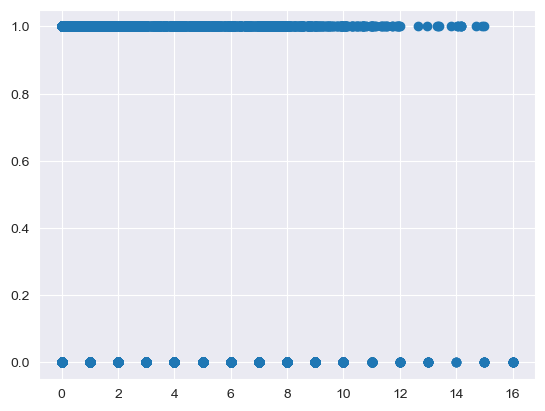

In [154]:
#visualizing the pattern of the data
plt.scatter(x_train_logistic['ART_Duration'],y_train)
plt.show()

In [155]:
#scaling the data for train and test
scler= StandardScaler()
x_train_logtic_scld = scler.fit_transform(x_train_logistic)
x_test_logtic_scld = scler.fit_transform(x_test_logistic)

###KKN classifier

In [156]:


#initaiting the model
lg_knn_clf= KNeighborsClassifier(n_neighbors=7)

#fitting the model
lg_knn_clf.fit(x_train_logtic_scld,y_train)

#Evaluating on the training set
y_pred = lg_knn_clf.predict(x_train_logtic_scld)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))
print('test set\n:')

#Evaluating on the test set
y_pred = lg_knn_clf.predict(x_test_logtic_scld)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[2098  217]
 [ 479 1855]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2315
           1       0.90      0.79      0.84      2334

    accuracy                           0.85      4649
   macro avg       0.85      0.85      0.85      4649
weighted avg       0.85      0.85      0.85      4649

test set
:
[[302 289]
 [ 69 503]]
              precision    recall  f1-score   support

           0       0.81      0.51      0.63       591
           1       0.64      0.88      0.74       572

    accuracy                           0.69      1163
   macro avg       0.72      0.70      0.68      1163
weighted avg       0.73      0.69      0.68      1163



###SVM model

In [157]:
#initaiting the model
lg_svm_clf= SVC(kernel='linear', C=1,probability=True)

#fitting the model
lg_svm_clf.fit(x_train_logtic_scld,y_train)

#Evaluating on the training set
y_pred = lg_svm_clf.predict(x_train_logtic_scld)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))
print('test set\n')

#Evaluating on the test set
y_pred = lg_svm_clf.predict(x_test_logtic_scld)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[1812  503]
 [1309 1025]]
              precision    recall  f1-score   support

           0       0.58      0.78      0.67      2315
           1       0.67      0.44      0.53      2334

    accuracy                           0.61      4649
   macro avg       0.63      0.61      0.60      4649
weighted avg       0.63      0.61      0.60      4649

test set

[[457 134]
 [334 238]]
              precision    recall  f1-score   support

           0       0.58      0.77      0.66       591
           1       0.64      0.42      0.50       572

    accuracy                           0.60      1163
   macro avg       0.61      0.59      0.58      1163
weighted avg       0.61      0.60      0.58      1163



In [158]:
#initaiting the model using rbf
lg_svm_clf1= SVC(kernel='rbf', probability=True,random_state=42)

#fitting the model 
lg_svm_clf1.fit(x_train_logtic_scld,y_train)

#Evaluating on the training set
y_pred = lg_svm_clf1.predict(x_train_logtic_scld)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

print('test set\n:')
#Evaluating on the test set
y_pred = lg_svm_clf1.predict(x_test_logtic_scld)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[1770  545]
 [1128 1206]]
              precision    recall  f1-score   support

           0       0.61      0.76      0.68      2315
           1       0.69      0.52      0.59      2334

    accuracy                           0.64      4649
   macro avg       0.65      0.64      0.63      4649
weighted avg       0.65      0.64      0.63      4649

test set
:
[[464 127]
 [274 298]]
              precision    recall  f1-score   support

           0       0.63      0.79      0.70       591
           1       0.70      0.52      0.60       572

    accuracy                           0.66      1163
   macro avg       0.66      0.65      0.65      1163
weighted avg       0.66      0.66      0.65      1163



In [159]:
#initaiting the model using poly
lg_svm_clf2= SVC(kernel='poly', degree=3)

#fitting the model 
lg_svm_clf2.fit(x_train_logtic_scld,y_train)

#Evaluating on the training set
y_pred = lg_svm_clf2.predict(x_train_logtic_scld)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

print('test set\n:')
#Evaluating on the test set
y_pred = lg_svm_clf2.predict(x_test_logtic_scld)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[1994  321]
 [1462  872]]
              precision    recall  f1-score   support

           0       0.58      0.86      0.69      2315
           1       0.73      0.37      0.49      2334

    accuracy                           0.62      4649
   macro avg       0.65      0.62      0.59      4649
weighted avg       0.65      0.62      0.59      4649

test set
:
[[503  88]
 [350 222]]
              precision    recall  f1-score   support

           0       0.59      0.85      0.70       591
           1       0.72      0.39      0.50       572

    accuracy                           0.62      1163
   macro avg       0.65      0.62      0.60      1163
weighted avg       0.65      0.62      0.60      1163



###LOGISTIC REGRESSION

In [160]:

lg_clf= LogisticRegression(solver='lbfgs')

#fitting the model 
lg_clf.fit(x_train_logtic_scld,y_train)

#Evaluating on the training set
y_pred = lg_clf.predict(x_train_logtic_scld)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))
print('test set\n')

#Evaluating on the test set
y_pred = lg_clf.predict(x_test_logtic_scld)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[1471  844]
 [1027 1307]]
              precision    recall  f1-score   support

           0       0.59      0.64      0.61      2315
           1       0.61      0.56      0.58      2334

    accuracy                           0.60      4649
   macro avg       0.60      0.60      0.60      4649
weighted avg       0.60      0.60      0.60      4649

test set

[[330 261]
 [242 330]]
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       591
           1       0.56      0.58      0.57       572

    accuracy                           0.57      1163
   macro avg       0.57      0.57      0.57      1163
weighted avg       0.57      0.57      0.57      1163



##DECISION TREE CLASSIFIER

In [161]:
#installing some packages
#!pip install pydotplus
#!pip install GraphViz
#!pip install graphviz

In [162]:
#importing the necessary libraries
#Zfrom sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

In [163]:
#initializing the DT model
lg_dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state= 42)

#fitting the model
lg_dt_clf.fit(x_train_logistic,y_train)

#Evaluating on the training set
y_pred = lg_dt_clf.predict(x_train_logistic)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

print('test set\n')
#Evaluating on the test set
y_pred = lg_dt_clf.predict(x_test_logistic)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[2115  200]
 [ 959 1375]]
              precision    recall  f1-score   support

           0       0.69      0.91      0.78      2315
           1       0.87      0.59      0.70      2334

    accuracy                           0.75      4649
   macro avg       0.78      0.75      0.74      4649
weighted avg       0.78      0.75      0.74      4649

test set

[[537  54]
 [243 329]]
              precision    recall  f1-score   support

           0       0.69      0.91      0.78       591
           1       0.86      0.58      0.69       572

    accuracy                           0.74      1163
   macro avg       0.77      0.74      0.74      1163
weighted avg       0.77      0.74      0.74      1163



In [164]:
#using the depth of 15
#initializing the DT model
lg_dt_clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state= 42)

#fitting the model
lg_dt_clf1.fit(x_train_logistic,y_train)

#Evaluating on the training set
y_pred = lg_dt_clf1.predict(x_train_logistic)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

print('test sey\n:')
#Evaluating on the test set
y_pred = lg_dt_clf1.predict(x_test_logistic)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[2170  145]
 [ 553 1781]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2315
           1       0.92      0.76      0.84      2334

    accuracy                           0.85      4649
   macro avg       0.86      0.85      0.85      4649
weighted avg       0.86      0.85      0.85      4649

test sey
:
[[549  42]
 [146 426]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       591
           1       0.91      0.74      0.82       572

    accuracy                           0.84      1163
   macro avg       0.85      0.84      0.84      1163
weighted avg       0.85      0.84      0.84      1163



#RANDOM FOREST CLASSIFIER


In [165]:
lg_rf_clf= RandomForestClassifier(max_depth=10, random_state=42, criterion='entropy')
lg_rf_clf.fit(x_train_logistic,y_train)

#Evaluating on the training set
y_pred = lg_rf_clf.predict(x_train_logistic)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

print('test set\n:')
#Evaluating on the testinging set
y_pred = lg_rf_clf.predict(x_test_logistic)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[2059  256]
 [ 651 1683]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      2315
           1       0.87      0.72      0.79      2334

    accuracy                           0.80      4649
   macro avg       0.81      0.81      0.80      4649
weighted avg       0.81      0.80      0.80      4649

test set
:
[[515  76]
 [174 398]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       591
           1       0.84      0.70      0.76       572

    accuracy                           0.79      1163
   macro avg       0.79      0.78      0.78      1163
weighted avg       0.79      0.79      0.78      1163



In [166]:
lg_rf_clf1= RandomForestClassifier(max_depth=15, random_state=42, criterion='entropy')
lg_rf_clf1.fit(x_train_logistic,y_train)

#Evaluating on the training set
y_pred = lg_rf_clf1.predict(x_train_logistic)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

print('test set\n:')
#Evaluating on the testinging set
y_pred = lg_rf_clf1.predict(x_test_logistic)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[2171  144]
 [ 379 1955]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2315
           1       0.93      0.84      0.88      2334

    accuracy                           0.89      4649
   macro avg       0.89      0.89      0.89      4649
weighted avg       0.89      0.89      0.89      4649

test set
:
[[547  44]
 [121 451]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       591
           1       0.91      0.79      0.85       572

    accuracy                           0.86      1163
   macro avg       0.86      0.86      0.86      1163
weighted avg       0.86      0.86      0.86      1163



##MULTI-LAYER PERCEPTRON

In [167]:
#importing the classifier from sklearn
from sklearn.neural_network import MLPClassifier

#modelling
lg_mlp = MLPClassifier(solver='lbfgs',activation='relu', alpha=0.00001, random_state=42, verbose=True, early_stopping=True )
lg_mlp.fit(x_train_logtic_scld, y_train)

#predicting on the train set
y_pred = lg_mlp.predict(x_train_logtic_scld)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

print('test set\n:')
#predicting on the test set
y_pred = lg_mlp.predict(x_test_logtic_scld)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[1667  648]
 [ 788 1546]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      2315
           1       0.70      0.66      0.68      2334

    accuracy                           0.69      4649
   macro avg       0.69      0.69      0.69      4649
weighted avg       0.69      0.69      0.69      4649

test set
:
[[410 181]
 [196 376]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       591
           1       0.68      0.66      0.67       572

    accuracy                           0.68      1163
   macro avg       0.68      0.68      0.68      1163
weighted avg       0.68      0.68      0.68      1163



# plotting ROC curves for the models from logistic features

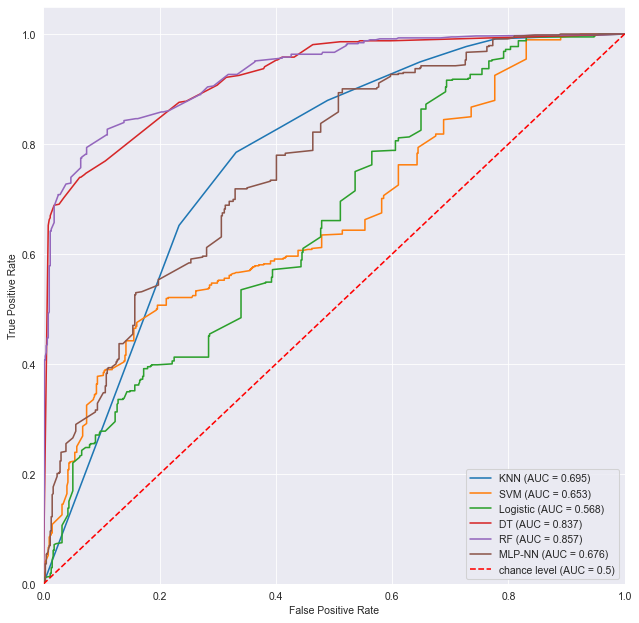

In [168]:
#for knn
knn_fpr,knn_tpr,thresholds1= roc_curve(y_test,lg_knn_clf.predict_proba(x_test_logtic_scld)[:,1])
lg_knn_roc_auc= roc_auc_score(y_test,lg_knn_clf.predict(x_test_logtic_scld))

#svm
svm_fpr,svm_tpr,thresholds2= roc_curve(y_test,lg_svm_clf1.predict_proba(x_test_logtic_scld)[:,1])
lg_svm_roc_auc= roc_auc_score(y_test,lg_svm_clf1.predict(x_test_logtic_scld))

#logistic regression
lg_fpr,lg_tpr,thresholds3= roc_curve(y_test,lg_clf.predict_proba(x_test_logtic_scld)[:,1])
lg_roc_auc= roc_auc_score(y_test,lg_clf.predict(x_test_logtic_scld))

#decision tree
dt_fpr,dt_tpr,thresholds4= roc_curve(y_test,lg_dt_clf1.predict_proba(x_test_logistic)[:,1])
lg_dt_roc_auc= roc_auc_score(y_test,lg_dt_clf1.predict(x_test_logistic))

#random forest
rf_fpr,rf_tpr,thresholds5= roc_curve(y_test,lg_rf_clf1.predict_proba(x_test_logistic)[:,1])
lg_rf_roc_auc= roc_auc_score(y_test,lg_rf_clf1.predict(x_test_logistic))

#MLP
mlp_fpr,mlp_tpr,thresholds6= roc_curve(y_test,lg_mlp.predict_proba(x_test_logtic_scld)[:,1])
lg_mlp_roc_auc= roc_auc_score(y_test,lg_mlp.predict(x_test_logtic_scld))

#plotting the ROCs on the same graph
plt.figure( figsize=(10,10), dpi=75)
#plt.title('THE ROC COMPARING THE AUC OF THE MODELS FROM LOGISTIC FEATURES( Cervical cancer screening)')
plt.plot(knn_fpr,knn_tpr, label='KNN (AUC = {:.3f})'.format(lg_knn_roc_auc))
plt.plot(svm_fpr,svm_tpr, label='SVM (AUC = {:.3f})'.format(lg_svm_roc_auc))
plt.plot(lg_fpr,lg_tpr, label='Logistic (AUC = {:.3f})'.format(lg_roc_auc))
plt.plot(dt_fpr,dt_tpr, label='DT (AUC = {:.3f})'.format(lg_dt_roc_auc))
plt.plot(rf_fpr,rf_tpr, label='RF (AUC = {:.3f})'.format(lg_rf_roc_auc))
plt.plot(mlp_fpr,mlp_tpr, label='MLP-NN (AUC = {:.3f})'.format(lg_mlp_roc_auc))
plt.plot([0, 1], [0, 1],'r--',label="chance level (AUC = 0.5)")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])                    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('roc_curve_for_glmodels.png', dpi=300, bbox_inches='tight')
plt.show()

# MODELLING WITH SELECTED FEATURES FROM RFE WITH RF

In [169]:
#selecting the varibles to be used
x_train_rfe= x_train[['Age','ART_Duration','BMI','METHOD_OF_FAMILY_PLANNING','WHO_HIV_CLINICAL_STAGE','TPT_STATUS','VIRAL_LOAD_QUALITATIVE']]
x_test_rfe= x_test[['Age','ART_Duration','BMI','METHOD_OF_FAMILY_PLANNING','WHO_HIV_CLINICAL_STAGE','TPT_STATUS','VIRAL_LOAD_QUALITATIVE']]

print(x_train_rfe.shape, x_test_rfe.shape)

(4649, 7) (1163, 7)


In [170]:
x_test_rfe.head()

,Age,ART_Duration,BMI,METHOD_OF_FAMILY_PLANNING,WHO_HIV_CLINICAL_STAGE,TPT_STATUS,VIRAL_LOAD_QUALITATIVE
239,39.000000,4.000000,23.000000,0,0,3,1
132,44.000000,5.000000,31.400000,0,0,3,1
3246,28.935317,1.935317,19.791072,0,0,3,1
4498,36.908985,0.546093,31.536172,0,0,0,0
3862,28.000000,1.310878,24.793263,0,0,1,1


In [171]:
#scaling the data for train and test
scler= StandardScaler()
x_train_rfe_scld = scler.fit_transform(x_train_rfe)
x_test_rfe_scld = scler.fit_transform(x_test_rfe)

##USING KKN MODEL

In [172]:
#initaiting the model
rfe_knn_clf= KNeighborsClassifier(n_neighbors=3)

#fitting the model
rfe_knn_clf.fit(x_train_rfe_scld,y_train)

#Evaluating on the training set
y_pred = rfe_knn_clf.predict(x_train_rfe_scld)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

print('test set\n:')
#Evaluating on the testing set
y_pred = rfe_knn_clf.predict(x_test_rfe_scld)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[2046  269]
 [  39 2295]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2315
           1       0.90      0.98      0.94      2334

    accuracy                           0.93      4649
   macro avg       0.94      0.93      0.93      4649
weighted avg       0.94      0.93      0.93      4649

test set
:
[[480 111]
 [ 24 548]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       591
           1       0.83      0.96      0.89       572

    accuracy                           0.88      1163
   macro avg       0.89      0.89      0.88      1163
weighted avg       0.89      0.88      0.88      1163



#using 10 neighbors

In [173]:
#initaiting the model
rfe_knn_clf1= KNeighborsClassifier(n_neighbors=5)

#fitting the model
rfe_knn_clf1.fit(x_train_rfe_scld,y_train)

#Evaluating on the training set
y_pred = rfe_knn_clf1.predict(x_train_rfe_scld)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

print('test set\n')
#Evaluating on the testing set
y_pred = rfe_knn_clf1.predict(x_test_rfe_scld)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[1909  406]
 [  70 2264]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      2315
           1       0.85      0.97      0.90      2334

    accuracy                           0.90      4649
   macro avg       0.91      0.90      0.90      4649
weighted avg       0.91      0.90      0.90      4649

test set

[[460 131]
 [ 29 543]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       591
           1       0.81      0.95      0.87       572

    accuracy                           0.86      1163
   macro avg       0.87      0.86      0.86      1163
weighted avg       0.87      0.86      0.86      1163



##SVM MODEL


In [174]:
#initaiting the model
rfe_svm_clf= SVC(kernel='linear')

#fitting the model
rfe_svm_clf.fit(x_train_rfe_scld,y_train)

#Evaluating on the training set
y_pred = rfe_svm_clf.predict(x_train_rfe_scld)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

print('test set\n')
#Evaluating on the testing set
y_pred = rfe_svm_clf.predict(x_test_rfe_scld)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[1609  706]
 [1081 1253]]
              precision    recall  f1-score   support

           0       0.60      0.70      0.64      2315
           1       0.64      0.54      0.58      2334

    accuracy                           0.62      4649
   macro avg       0.62      0.62      0.61      4649
weighted avg       0.62      0.62      0.61      4649

test set

[[397 194]
 [271 301]]
              precision    recall  f1-score   support

           0       0.59      0.67      0.63       591
           1       0.61      0.53      0.56       572

    accuracy                           0.60      1163
   macro avg       0.60      0.60      0.60      1163
weighted avg       0.60      0.60      0.60      1163



In [175]:
#initaiting the model
rfe_svm_clf1= SVC(kernel='rbf', probability=True)

#fitting the model
rfe_svm_clf1.fit(x_train_rfe_scld,y_train)

#Evaluating on the training set
y_pred = rfe_svm_clf1.predict(x_train_rfe_scld)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

print('test set\n')
#Evaluating on the testing set
y_pred = rfe_svm_clf1.predict(x_test_rfe_scld)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[1650  665]
 [ 483 1851]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      2315
           1       0.74      0.79      0.76      2334

    accuracy                           0.75      4649
   macro avg       0.75      0.75      0.75      4649
weighted avg       0.75      0.75      0.75      4649

test set

[[430 161]
 [131 441]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       591
           1       0.73      0.77      0.75       572

    accuracy                           0.75      1163
   macro avg       0.75      0.75      0.75      1163
weighted avg       0.75      0.75      0.75      1163



In [176]:
#initaiting the model
rfe_svm_clf2= SVC(kernel='poly', degree=3)

#fitting the model
rfe_svm_clf2.fit(x_train_rfe_scld,y_train)

#Evaluating on the training set
y_pred = rfe_svm_clf2.predict(x_train_rfe_scld)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

print('test set\n')
#Evaluating on the testing set
y_pred = rfe_svm_clf2.predict(x_test_rfe_scld)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[1708  607]
 [ 734 1600]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      2315
           1       0.72      0.69      0.70      2334

    accuracy                           0.71      4649
   macro avg       0.71      0.71      0.71      4649
weighted avg       0.71      0.71      0.71      4649

test set

[[425 166]
 [195 377]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       591
           1       0.69      0.66      0.68       572

    accuracy                           0.69      1163
   macro avg       0.69      0.69      0.69      1163
weighted avg       0.69      0.69      0.69      1163



#LOGISTIC REGRESSION

In [177]:
rfe_lg_clf= LogisticRegression()

#fitting the model 
rfe_lg_clf.fit(x_train_rfe_scld,y_train)

#Evaluating on the training set
y_pred = rfe_lg_clf.predict(x_train_rfe_scld)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

print('test set\n')
#Evaluating on the testing set
y_pred = rfe_lg_clf.predict(x_test_rfe_scld)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[1437  878]
 [ 814 1520]]
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      2315
           1       0.63      0.65      0.64      2334

    accuracy                           0.64      4649
   macro avg       0.64      0.64      0.64      4649
weighted avg       0.64      0.64      0.64      4649

test set

[[349 242]
 [208 364]]
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       591
           1       0.60      0.64      0.62       572

    accuracy                           0.61      1163
   macro avg       0.61      0.61      0.61      1163
weighted avg       0.61      0.61      0.61      1163



##DECISION TREE CLASSIFIER

In [178]:
#initializing the DT model
rfe_dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state= 42)

#fitting the model
rfe_dt_clf.fit(x_train_rfe,y_train)

#Evaluating on the training set
y_pred = rfe_dt_clf.predict(x_train_rfe)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

print('test set\n')
#Evaluating on the testing set
y_pred = rfe_dt_clf.predict(x_test_rfe)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[2269   46]
 [  98 2236]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2315
           1       0.98      0.96      0.97      2334

    accuracy                           0.97      4649
   macro avg       0.97      0.97      0.97      4649
weighted avg       0.97      0.97      0.97      4649

test set

[[529  62]
 [ 60 512]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       591
           1       0.89      0.90      0.89       572

    accuracy                           0.90      1163
   macro avg       0.90      0.90      0.90      1163
weighted avg       0.90      0.90      0.90      1163



##RANDOM FOREST

In [179]:
#initiating the model
rfe_rf_clf= RandomForestClassifier(max_depth=10, random_state=42, criterion='entropy')
rfe_rf_clf.fit(x_train_rfe,y_train)

#Evaluating on the training set
y_pred = rfe_rf_clf.predict(x_train_rfe)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

print('test set\n')
#Evaluating on the training set
y_pred = rfe_rf_clf.predict(x_test_rfe)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[2140  175]
 [ 181 2153]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2315
           1       0.92      0.92      0.92      2334

    accuracy                           0.92      4649
   macro avg       0.92      0.92      0.92      4649
weighted avg       0.92      0.92      0.92      4649

test set

[[544  47]
 [ 68 504]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       591
           1       0.91      0.88      0.90       572

    accuracy                           0.90      1163
   macro avg       0.90      0.90      0.90      1163
weighted avg       0.90      0.90      0.90      1163



#MULT-LAYER PERCEPTRON

In [180]:
#modelling
rfe_mlp = MLPClassifier(solver='lbfgs',activation='relu', alpha=0.0001, random_state=42, verbose=True, early_stopping=True )
rfe_mlp.fit(x_train_rfe_scld, y_train)

#predicting on the train set
y_pred = rfe_mlp.predict(x_train_rfe_scld)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

#predicting on the train set
y_pred = rfe_mlp.predict(x_test_rfe_scld)
print('test set\n')
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))


[[2046  269]
 [ 150 2184]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      2315
           1       0.89      0.94      0.91      2334

    accuracy                           0.91      4649
   macro avg       0.91      0.91      0.91      4649
weighted avg       0.91      0.91      0.91      4649

test set

[[500  91]
 [ 43 529]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       591
           1       0.85      0.92      0.89       572

    accuracy                           0.88      1163
   macro avg       0.89      0.89      0.88      1163
weighted avg       0.89      0.88      0.88      1163



In [181]:
#modelling
rfe_mlp1 = MLPClassifier(solver='lbfgs',activation='identity', alpha=0.0001, random_state=42, verbose=True, early_stopping=True )
rfe_mlp1.fit(x_train_rfe_scld, y_train)

#predicting on the train set
y_pred = rfe_mlp1.predict(x_train_rfe_scld)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

#predicting on the test set
y_pred = rfe_mlp1.predict(x_test_rfe_scld)
print('test set\n')
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))


[[1437  878]
 [ 814 1520]]
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      2315
           1       0.63      0.65      0.64      2334

    accuracy                           0.64      4649
   macro avg       0.64      0.64      0.64      4649
weighted avg       0.64      0.64      0.64      4649

test set

[[349 242]
 [208 364]]
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       591
           1       0.60      0.64      0.62       572

    accuracy                           0.61      1163
   macro avg       0.61      0.61      0.61      1163
weighted avg       0.61      0.61      0.61      1163



In [182]:
#modelling
rfe_mlp2 = MLPClassifier(solver='adam',activation='logistic', alpha=0.0001, random_state=42, verbose=True, early_stopping=True )
rfe_mlp2.fit(x_train_rfe_scld, y_train)

#predicting on the train set
y_pred = rfe_mlp2.predict(x_train_rfe_scld)
print(confusion_matrix(y_train,y_pred))

print(classification_report(y_train,y_pred))

#predicting on the test set
y_pred = rfe_mlp2.predict(x_test_rfe_scld)
print('test set\n')
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))


Iteration 1, loss = 0.70423215
Validation score: 0.610753
Iteration 2, loss = 0.67543630
Validation score: 0.636559
Iteration 3, loss = 0.66708169
Validation score: 0.595699
Iteration 4, loss = 0.66154123
Validation score: 0.608602
Iteration 5, loss = 0.65782221
Validation score: 0.610753
Iteration 6, loss = 0.65508239
Validation score: 0.617204
Iteration 7, loss = 0.65304237
Validation score: 0.630108
Iteration 8, loss = 0.65146271
Validation score: 0.638710
Iteration 9, loss = 0.65074286
Validation score: 0.662366
Iteration 10, loss = 0.64985958
Validation score: 0.645161
Iteration 11, loss = 0.64955530
Validation score: 0.643011
Iteration 12, loss = 0.64916993
Validation score: 0.664516
Iteration 13, loss = 0.64876778
Validation score: 0.655914
Iteration 14, loss = 0.64836432
Validation score: 0.666667
Iteration 15, loss = 0.64832498
Validation score: 0.662366
Iteration 16, loss = 0.64841224
Validation score: 0.655914
Iteration 17, loss = 0.64851159
Validation score: 0.662366
Iterat

# plotting ROC curves for the models from RFE features

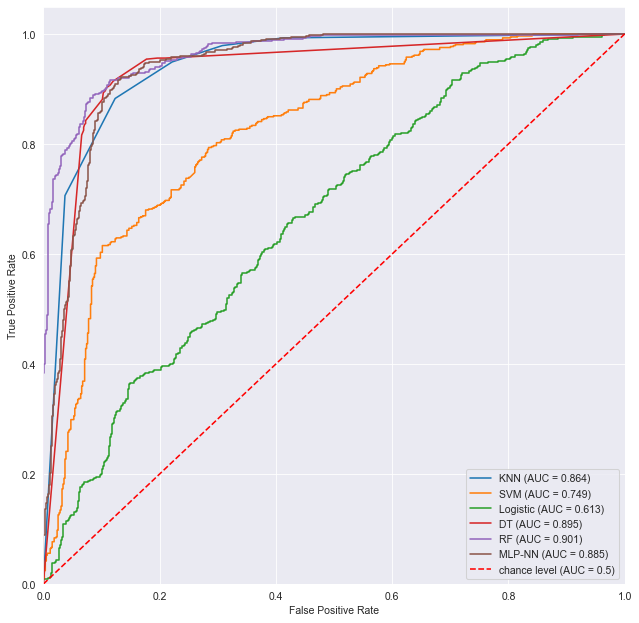

In [183]:
#for knn
knn_fpr,knn_tpr,thresholds1= roc_curve(y_test,rfe_knn_clf1.predict_proba(x_test_rfe_scld)[:,1])
lg_knn_roc_auc= roc_auc_score(y_test,rfe_knn_clf1.predict(x_test_rfe_scld))

#svm
svm_fpr,svm_tpr,thresholds2= roc_curve(y_test,rfe_svm_clf1.predict_proba(x_test_rfe_scld)[:,1])
lg_svm_roc_auc= roc_auc_score(y_test,rfe_svm_clf1.predict(x_test_rfe_scld))

#logistic regression
lg_fpr,lg_tpr,thresholds3= roc_curve(y_test,rfe_lg_clf.predict_proba(x_test_rfe_scld)[:,1])
lg_roc_auc= roc_auc_score(y_test,rfe_lg_clf.predict(x_test_rfe_scld))

#decision tree
dt_fpr,dt_tpr,thresholds4= roc_curve(y_test,rfe_dt_clf.predict_proba(x_test_rfe)[:,1])
lg_dt_roc_auc= roc_auc_score(y_test,rfe_dt_clf.predict(x_test_rfe))

#random forest
rf_fpr,rf_tpr,thresholds5= roc_curve(y_test,rfe_rf_clf.predict_proba(x_test_rfe)[:,1])
lg_rf_roc_auc= roc_auc_score(y_test,rfe_rf_clf.predict(x_test_rfe))

#MLP
mlp_fpr,mlp_tpr,thresholds6= roc_curve(y_test,rfe_mlp.predict_proba(x_test_rfe_scld)[:,1])
lg_mlp_roc_auc= roc_auc_score(y_test,rfe_mlp.predict(x_test_rfe_scld))

#plotting the ROCs on the same graph
plt.figure( figsize=(10,10), dpi=75)
#plt.title('PLOTTING THE ROC AND COMPARING THEIR AUC FROM RFE( Cervical cancer screening)')
plt.plot(knn_fpr,knn_tpr, label='KNN (AUC = {:.3f})'.format(lg_knn_roc_auc))
plt.plot(svm_fpr,svm_tpr, label='SVM (AUC = {:.3f})'.format(lg_svm_roc_auc))
plt.plot(lg_fpr,lg_tpr, label='Logistic (AUC = {:.3f})'.format(lg_roc_auc))
plt.plot(dt_fpr,dt_tpr, label='DT (AUC = {:.3f})'.format(lg_dt_roc_auc))
plt.plot(rf_fpr,rf_tpr, label='RF (AUC = {:.3f})'.format(lg_rf_roc_auc))
plt.plot(mlp_fpr,mlp_tpr, label='MLP-NN (AUC = {:.3f})'.format(lg_mlp_roc_auc))
plt.plot([0, 1], [0, 1],'r--',label="chance level (AUC = 0.5)")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('roc_curve_for_rfemodels.png', dpi=300, bbox_inches='tight')
plt.show()

# creating dataframes for the perfomance results for the models and plotting

In [184]:
lg_table_of_results={ 'Algorithm': ['RF','DT','KNN','MLP','SVM','LR'],
                   'Precision': [91,91,64,68,70,56],
                   'Recall': [79,74,88,66,52,58],
                   'F1_score': [85,82,74,67,60,57],
                   'Accuracy': [86,84,69,68,66,57]
                   }

#creating a dataframe
results_df= pd.DataFrame(lg_table_of_results)

#result_df.sort_values(by='Algorithm', ascending=False)
#results_df.to_excel('lg_table.xlsx',index=False)

results_df


,Algorithm,Precision,Recall,F1_score,Accuracy
0,RF,91,79,85,86
1,DT,91,74,82,84
2,KNN,64,88,74,69
3,MLP,68,66,67,68
4,SVM,70,52,60,66
5,LR,56,58,57,57


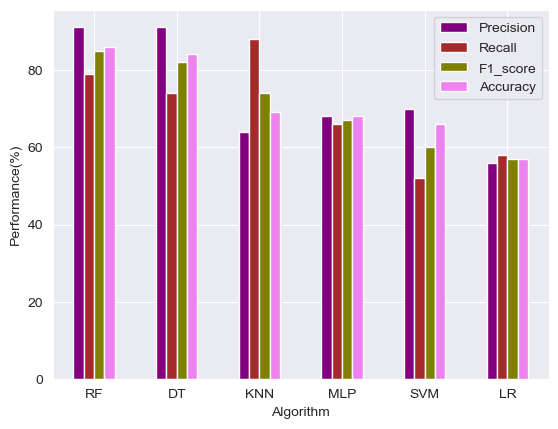

In [185]:
results_df.plot(kind='bar',x="Algorithm", rot=False, color= ['purple','brown','olive','violet'])
plt.ylabel('Performance(%)')
plt.savefig('logisticmodels.png')
plt.show(block=True)

In [186]:
rfe_table_of_results={'Algorithm': ['RF','DT','MLP','KNN','SVM','LR'],
                   'Precision': [91,89,85,81,73,60],
                   'Recall': [88,90,92,95,77,64],
                   'F1_score': [90,89,89,87,75,62],
                   'Accuracy': [90,90,88,86,75,61]
                   }

#creating a dataframe
results_df1= pd.DataFrame(rfe_table_of_results)
#results_df1.to_excel('rfe_table.xlsx',index=False)

results_df1
                   

,Algorithm,Precision,Recall,F1_score,Accuracy
0,RF,91,88,90,90
1,DT,89,90,89,90
2,MLP,85,92,89,88
3,KNN,81,95,87,86
4,SVM,73,77,75,75
5,LR,60,64,62,61


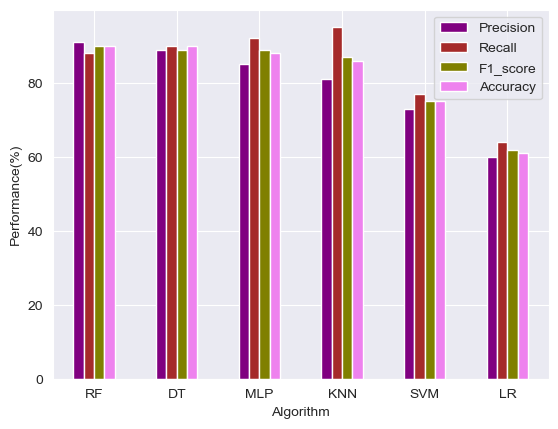

<Figure size 640x480 with 0 Axes>

In [187]:
results_df1.plot(kind='bar',x="Algorithm", rot=False, color= ['purple','brown','olive','violet'])
plt.ylabel('Performance(%)')
plt.show(block=True)
plt.savefig('rfemodels.png')


#comparing the accuracies 0f the models

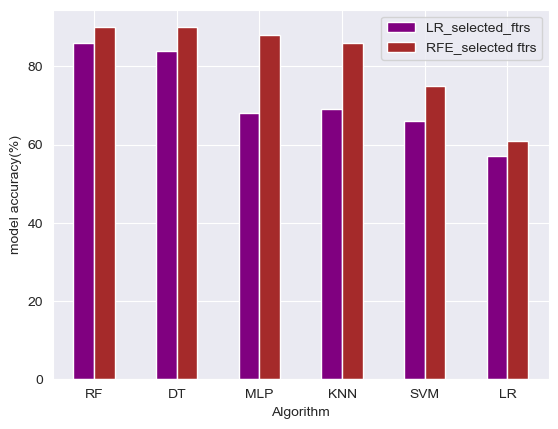

<Figure size 640x480 with 0 Axes>

In [188]:
combined_results={'Algorithm': ['RF','DT','MLP','KNN','SVM','LR'],
                  'LR_selected_ftrs': [86,84,68,69,66,57],
                   'RFE_selected ftrs': [90,90,88,86,75,61]
                   }

#creating a dataframe
combined_df1= pd.DataFrame(combined_results)

combined_df1.plot(kind='bar',x="Algorithm", rot=False, color= ['purple','brown'])
plt.ylabel('model accuracy(%)')
plt.show(block=True)
plt.savefig('modelscomparsn.png')
plt.show()

In [189]:
#!pip install ipywidgets

In [190]:


#Prediction Function
def make_prediction(age, duration, bmi, f_planning, who_hiv_status, tpt_status, viral_lq):
    data ={
        'age':age,
        'duration':duration,
        'bmi': bmi,
        'f_planning':f_planning,
        'who_hiv_status':who_hiv_status,
        'tpt_status':tpt_status,
        'viral_lq':viral_lq
    }
    
    df =pd.DataFrame(data=data, index=[0])
    prediction = model.predict(df).round(0)[0]
    return f"Predicted Cervical Cancer Status:{prediction}"

#making prediction
make_prediction(30, 4.0, 34.56,0,1,2,1)

#Intractive interface
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

interact(
    make_prediction,
    age=IntSlider(
        min=x_train_rfe["Age"].min(),
        max=x_train_rfe["Age"].max(),
        value=x_train_rfe["Age"].mean(),
    ),
    Art_Duration=FloatSlider(
        min=x_train_rfe["ART_Duration"].min(),
        max=x_train_rfe["ART_Duration"].max(),
        step=0.01,
        value=x_train_rfe["ART_Duration"].mean(),
    ),
    BMI=FloatSlider(
        min=x_train_rfe["BMI"].min(),
        max=x_train_rfe["BMI"].max(),
        step=0.01,
        value=x_train_rfe["BMI"].mean(),
    ),
    METHOD_OF_FAMILY_PLANNING=Dropdown(options=sorted(x_train_rfe["METHOD_OF_FAMILY_PLANNING"].unique())),
    WHO_HIV_CLINICAL_STAGE=Dropdown(options=sorted(x_train_rfe["WHO_HIV_CLINICAL_STAGE"].unique())),
    TPT_STATUS=Dropdown(options=sorted(x_train_rfe["TPT_STATUS"].unique())),
    VIRAL_LOAD_QUALITATIVE=Dropdown(options=sorted(x_train_rfe["VIRAL_LOAD_QUALITATIVE"].unique()))
)

NotFittedError: This RFE instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.